<a href="https://colab.research.google.com/github/Micasaccone/ProyectoDS_EntregaFinal_-SacconeMicaela/blob/main/SACCONE_MICAELA_PROYECTO_DATA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Presentación del proyecto**

**Análisis peliculas estrenadas entre 2010 - 2019**

Este proyecto tiene como objetivo desarrollar un modelo predictivo para estimar el ImbdRating de películas, utilizando un conjunto de datos que abarca películas estrenadas entre 2015 y 2019.

La variable objetivo, ImbdRating, se analizará en función de diversas características de las películas, incluyendo su género, país de producción, año de estreno, idioma y número de votos. A través de un análisis exploratorio de datos (EDA), se identificarán patrones y relaciones entre estas variables y el ImbdRating.

Posteriormente, se utilizarán técnicas de regresión para construir un modelo que permita predecir el rating de nuevas películas. Este estudio busca proporcionar una comprensión más profunda de los factores que influyen en la calificación de las películas y crear un modelo capaz de predecir las calificaciones futuras con base en características observables.

En el ámbito comercial, el ImbdRating no solo refleja el gusto del público, sino que también impacta en la rentabilidad y el éxito comercial de una película. Los estudios de cine, plataformas de streaming y productores independientes se benefician al poder predecir las calificaciones que una película podría recibir antes de su lanzamiento. Esto les permite optimizar estrategias de marketing, determinar presupuestos de producción más adecuados y hacer elecciones más informadas sobre qué proyectos financiar.

- Algunas preguntas a resolver:
1) ¿Cuáles géneros tienen un mayor ImbdRating promedio?
2) ¿Hay una relación entre el país productor y el ImbdRating?
3) ¿Existe una relación entre el año de estreno y el ImbdRating?
4) Las películas en inglés tienen una calificación promedio más alta que las de otros idiomas?
5) ¿Las películas con más votos tienden a tener una calificación más cercana a la media?

**Hipótesis**: Se plantea que las películas mejor calificadas son aquellas producidas en Estados Unidos, en idioma inglés, y que el género con mayor recaudación en taquilla es el de acción. Mediante un análisis detallado de los datos, se evaluará la validez de esta hipótesis

# **Presentación ejecutiva**

https://docs.google.com/presentation/d/16M4XkWSqvtRnk04agVtTyuwKUCCyxY4vd3XUMjeDCRQ/edit#slide=id.g3470856c8d1_0_24

# **Lectura de datos**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import trim_mean
from scipy.stats import norm
from scipy import stats
import statistics
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


In [3]:
  df = pd.read_excel('/content/movies2010.2019.xlsx')
  df.head()

,imdbID,title,year,rating,runtime,genre,released,director,writer,cast,...,imdbRating,imdbVotes,poster,plot,fullplot,country,language,awards,lastupdated,type
0,146592,Pï¿½l Adrienn,2010,NaN,136 min,Drama,2015-05-06,ï¿½gnes Kocsis,"ï¿½gnes Kocsis (screenplay), Andrea Roberti (s...","ï¿½va Gï¿½bor, Istvï¿½n Znamenï¿½k, ï¿½kos Hor...",...,6.8,5309,https://m.media-amazon.com/images/M/MV5BMTk2Mz...,"A lonely obese nurse, working at a hospital te...","A lonely obese nurse, working at a hospital te...",USA,Hungarian,4 wins & 5 nominations.,00:00:29.400000,movie
1,326965,In My Sleep,2010,PG-13,104 min,Drama,2011-03-17,Allen Wolf,Allen Wolf,"Philip Winchester, Tim Draxl, Lacey Chabert, A...",...,5.5,2735,https://m.media-amazon.com/images/M/MV5BNzg1MD...,Marcus is a popular massage therapist who stru...,Marcus is a popular massage therapist who stru...,USA,English,6 wins.,00:37:59.600000,movie
2,374463,The Pacific,2010,TV-MA,52 min,Action,2013-02-12,NaN,NaN,"James Badge Dale, Joseph Mazzello, Jon Seda, S...",...,8.3,5329,https://m.media-amazon.com/images/M/MV5BNDY5NT...,The intertwined stories of three Marines durin...,The Pacific follows the lives of a U.S Marine ...,France,English,Nominated for 1 Golden Globe. Another 23 wins ...,00:04:50.100000,series
3,398286,Tangled,2010,PG,100 min,Animation,2014-04-26,"Nathan Greno, Byron Howard","Dan Fogelman (screenplay), Jacob Grimm (fairy ...","Mandy Moore, Zachary Levi, Donna Murphy, Ron P...",...,7.8,5201,https://m.media-amazon.com/images/M/MV5BMTAxND...,The magically long-haired Rapunzel has spent h...,After receiving the healing powers from a magi...,USA,English,Nominated for 1 Oscar. Another 8 wins & 38 nom...,00:05:18.900000,movie
4,403645,Utomlyonnye solntsem 2: Predstoyanie,2010,NaN,181 min,Drama,2012-04-13,Nikita Mikhalkov,"Nikita Mikhalkov, Vladimir Moiseenko, Aleksand...","Nikita Mikhalkov, Oleg Menshikov, Nadezhda Mik...",...,4.1,1829,https://m.media-amazon.com/images/M/MV5BMTQwMj...,"Epic film about WWII, a sequel to Burnt by the...","Epic film about WWII, a sequel to Burnt by the...",France,Russian,1 win & 2 nominations.,00:57:12.800000,movie


In [4]:
df.shape

(11183, 21)

**Definición de Variables**

- **imdbID** → Identificador único de la película en la base de datos de IMDb(Internet Movie Database).
- **title** → Título oficial de la película.
- **year** → Año en que se estrenó la película. En el trabajo lo identificamos como **"Años"**
* **rating** → Clasificación por edades (ej.: PG, R, 18+)
- **runtime** → Duración total de la película en minutos.
- **genre** → Género o géneros de la película (ej.: Acción, Drama, Comedia). En el trabajo lo identificamos como **"Género"**
- **released** → Fecha exacta de estreno de la película.
- **director** → Nombre del director o directora de la película.
- **writer** → Nombre del guionista o guionistas de la película.
- **cast** → Lista de actores y actrices principales.
- **metacritic** → Puntuación de la película en Metacritic (escala de 0 a 100).
- **imdbRating** → Puntuación promedio de la película en IMDb (escala de 1 a 10).
- **imdbVotes** → Número total de votos recibidos en IMDb.
- **poster** → URL de la imagen del póster de la película.
- **plot** → Resumen breve de la trama de la película.
- **fullplot** → Descripción detallada y completa de la trama.
- **language** → Idioma(s) original(es) en los que fue filmada la película. En el trabajo lo identificaremos como **"Lenguaje"**
- **country** → País o países donde se produjo la película. En el trabajo lo identificaremos como **"País"**
- **awards** → Premios ganados o nominaciones recibidas.
- **lastupdated** → Última fecha en que se actualizó la información de la película en la base de datos.
- **type** → Tipo de contenido (ej.: "movie" para películas, "series" para series, "documentary" para documentales).

# **Data Wrangling - Limpieza y transformación de datos**




Vamos a analizar los datos nulos y realizar los correspondientes reemplazos o eliminación, también se realiza la verificación de valores duplicados

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11183 entries, 0 to 11182
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   imdbID       11183 non-null  int64         
 1   title        11183 non-null  object        
 2   year         11183 non-null  int64         
 3   rating       4263 non-null   object        
 4   runtime      9751 non-null   object        
 5   genre        11047 non-null  object        
 6   released     10217 non-null  datetime64[ns]
 7   director     11039 non-null  object        
 8   writer       10106 non-null  object        
 9   cast         10737 non-null  object        
 10  metacritic   3451 non-null   float64       
 11  imdbRating   10119 non-null  float64       
 12  imdbVotes    11183 non-null  int64         
 13  poster       8403 non-null   object        
 14  plot         10190 non-null  object        
 15  fullplot     9867 non-null   object        
 16  coun

Transformamos la variable released a int para hacer más facil en análisis

In [6]:
df['released'] = pd.to_datetime(df['released'])
df['released'] = df['released'].dt.year
df['released'] = df['released'].fillna(0).astype(int)


**En el desarrollo del proyecto vamos a utilizar las variables categóricas: "Género", "País", "Lenguaje". Visualizamos que tienen muchas categorías, vamos a realizar un análisis para verificar si son necesarias todas o podemos trabajar con un "Top 10"**

In [7]:
for col in df.select_dtypes(include=['object', 'category']):
    print(f'{col}: {df[col].nunique()} categorias')


title: 10829 categorias
rating: 17 categorias
runtime: 215 categorias
genre: 25 categorias
director: 8272 categorias
writer: 9362 categorias
cast: 10481 categorias
poster: 8248 categorias
plot: 10008 categorias
fullplot: 9703 categorias
country: 60 categorias
language: 90 categorias
awards: 849 categorias
lastupdated: 9091 categorias
type: 2 categorias


In [8]:
top_10 = df['country'].value_counts().head(10)
total_registros = df['country'].count()
top_10_sum = top_10.sum()
porcentaje_top_10 = (top_10_sum / total_registros) * 100
print(f"El Top 10 de categorías representa el {porcentaje_top_10:.2f}% del total de categorías.")


El Top 10 de categorías representa el 93.54% del total de categorías.


In [9]:
top_10 = df['language'].value_counts().head(10)
total_registros = df['language'].count()
top_10_sum = top_10.sum()
porcentaje_top_10 = (top_10_sum / total_registros) * 100
print(f"El Top 10 de categorías representa el {porcentaje_top_10:.2f}% del total de categorías.")

El Top 10 de categorías representa el 87.39% del total de categorías.


In [10]:
top_10 = df['genre'].value_counts().head(10)
total_registros = df['genre'].count()
top_10_sum = top_10.sum()
porcentaje_top_10 = (top_10_sum / total_registros) * 100
print(f"El Top 10 de categorías representa el {porcentaje_top_10:.2f}% del total de categorías.")

El Top 10 de categorías representa el 95.22% del total de categorías.


**En este caso las tres variables representan mas del 80% del dataset, por lo cuál sería lógico reemplazar el resto de las categorías por "otros"**

In [11]:
top_10_categoria_1 = df['country'].value_counts().head(10).index
top_10_categoria_2 = df['language'].value_counts().head(10).index
top_10_categoria_3 = df['genre'].value_counts().head(10).index

df['country'] = df['country'].apply(lambda x: x if x in top_10_categoria_1 else 'otros')
df['language'] = df['language'].apply(lambda x: x if x in top_10_categoria_2 else 'otros')
df['genre'] = df['genre'].apply(lambda x: x if x in top_10_categoria_3 else 'otros')

df.head()


,imdbID,title,year,rating,runtime,genre,released,director,writer,cast,...,imdbRating,imdbVotes,poster,plot,fullplot,country,language,awards,lastupdated,type
0,146592,Pï¿½l Adrienn,2010,NaN,136 min,Drama,2015,ï¿½gnes Kocsis,"ï¿½gnes Kocsis (screenplay), Andrea Roberti (s...","ï¿½va Gï¿½bor, Istvï¿½n Znamenï¿½k, ï¿½kos Hor...",...,6.8,5309,https://m.media-amazon.com/images/M/MV5BMTk2Mz...,"A lonely obese nurse, working at a hospital te...","A lonely obese nurse, working at a hospital te...",USA,otros,4 wins & 5 nominations.,00:00:29.400000,movie
1,326965,In My Sleep,2010,PG-13,104 min,Drama,2011,Allen Wolf,Allen Wolf,"Philip Winchester, Tim Draxl, Lacey Chabert, A...",...,5.5,2735,https://m.media-amazon.com/images/M/MV5BNzg1MD...,Marcus is a popular massage therapist who stru...,Marcus is a popular massage therapist who stru...,USA,English,6 wins.,00:37:59.600000,movie
2,374463,The Pacific,2010,TV-MA,52 min,Action,2013,NaN,NaN,"James Badge Dale, Joseph Mazzello, Jon Seda, S...",...,8.3,5329,https://m.media-amazon.com/images/M/MV5BNDY5NT...,The intertwined stories of three Marines durin...,The Pacific follows the lives of a U.S Marine ...,France,English,Nominated for 1 Golden Globe. Another 23 wins ...,00:04:50.100000,series
3,398286,Tangled,2010,PG,100 min,Animation,2014,"Nathan Greno, Byron Howard","Dan Fogelman (screenplay), Jacob Grimm (fairy ...","Mandy Moore, Zachary Levi, Donna Murphy, Ron P...",...,7.8,5201,https://m.media-amazon.com/images/M/MV5BMTAxND...,The magically long-haired Rapunzel has spent h...,After receiving the healing powers from a magi...,USA,English,Nominated for 1 Oscar. Another 8 wins & 38 nom...,00:05:18.900000,movie
4,403645,Utomlyonnye solntsem 2: Predstoyanie,2010,NaN,181 min,Drama,2012,Nikita Mikhalkov,"Nikita Mikhalkov, Vladimir Moiseenko, Aleksand...","Nikita Mikhalkov, Oleg Menshikov, Nadezhda Mik...",...,4.1,1829,https://m.media-amazon.com/images/M/MV5BMTQwMj...,"Epic film about WWII, a sequel to Burnt by the...","Epic film about WWII, a sequel to Burnt by the...",France,Russian,1 win & 2 nominations.,00:57:12.800000,movie


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
imdbID,11183.0,2.434488e+06,966521.979656,69049.0,1696093.0,2200989.0,3120997.0,5016760.0
year,11183.0,2.012671e+03,1.691088,2010.0,2011.0,2013.0,2014.0,2015.0
released,11183.0,1.838928e+03,565.474138,0.0,2011.0,2013.0,2014.0,2017.0
metacritic,3451.0,5.615387e+01,17.436022,1.0,44.0,57.0,69.0,100.0
imdbRating,10119.0,6.259067e+00,1.224776,1.2,5.6,6.4,7.1,9.5
imdbVotes,11183.0,3.583439e+03,1205.774479,1504.0,2534.0,3577.0,4632.5,5687.0


In [13]:
df.describe(include=['object']).T

,count,unique,top,freq
title,11183,10829,Mad As Hell,5
rating,4263,17,R,1775
runtime,9751,215,90 min,689
genre,11183,11,Drama,2648
director,11039,8272,Jay Chapman,17
writer,10106,9362,Louis Theroux,9
cast,10737,10481,"Claudia Galli, Richard Ulfsï¿½ter, Eva Fritjof...",5
poster,8403,8248,https://m.media-amazon.com/images/M/MV5BMjI2OT...,5
plot,10190,10008,"The Young Turks, one of the most popular onlin...",5
fullplot,9867,9703,"The Young Turks, one of the most popular onlin...",5


Observamos que la variable "Title" cuenta con 10829 valores únicos, mientras que los valores totales son 11183. Vamos a identificar si el año es diferente (En ese caso vamos a interpretar que fue un relanzamiento de la pelicula).

In [14]:
duplicates = df[df.duplicated(subset=['title'], keep=False)]
duplicates_with_year = duplicates[['title', 'year']]
duplicates_with_year


,title,year
24,Who Is Harry Nilsson (And Why Is Everybody Tal...,2010
27,Who Is Harry Nilsson (And Why Is Everybody Tal...,2010
36,A Letter to Elia,2010
38,Percy Jackson & the Olympians: The Lightning T...,2010
46,The Town,2010
...,...,...
10952,Amber Alert,2015
11094,Paradise,2015
11122,Rebirth,2015
11146,Guilty,2015


In [15]:
df = df.drop_duplicates(subset=['title', 'year'], keep='first')


In [16]:
df.describe(include=['object']).T

,count,unique,top,freq
title,10976,10829,Love,3
rating,4141,17,R,1714
runtime,9551,215,90 min,673
genre,10976,11,Drama,2602
director,10835,8261,Jay Chapman,17
writer,9918,9342,Louis Theroux,9
cast,10533,10445,"Claudia Galli, Richard Ulfsï¿½ter, Eva Fritjof...",5
poster,8228,8226,https://m.media-amazon.com/images/M/MV5BMTQ5MT...,2
plot,9988,9982,Desperate measures are taken by a man who trie...,3
fullplot,9679,9676,Riza is a minibus driver universally loved by ...,2


Eliminamos aquellos títulos que son iguales y tienen el mismo año, entendiento que los restantes, por más que coincidan el resto de las variables, si el año es diferente es un "relanzamiento".

In [17]:
df.duplicated().sum()

np.int64(0)

**Observamos que en este dataset no hay datos duplicados**

In [18]:
nulos_por_variable = df.isnull()
cantidad_nulos_por_variable = nulos_por_variable.sum()
variables_con_nulos = cantidad_nulos_por_variable[cantidad_nulos_por_variable > 0]
lista_variables_con_nulos = variables_con_nulos.index.tolist()
for variable in lista_variables_con_nulos:
    cantidad_nulos = cantidad_nulos_por_variable[variable]
    porcentaje_nulos = (cantidad_nulos / len(df)) * 100
    print(f"Variable: {variable}, Cantidad de Nulos: {cantidad_nulos}, Porcentaje: {porcentaje_nulos:.2f}%")

Variable: rating, Cantidad de Nulos: 6835, Porcentaje: 62.27%
Variable: runtime, Cantidad de Nulos: 1425, Porcentaje: 12.98%
Variable: director, Cantidad de Nulos: 141, Porcentaje: 1.28%
Variable: writer, Cantidad de Nulos: 1058, Porcentaje: 9.64%
Variable: cast, Cantidad de Nulos: 443, Porcentaje: 4.04%
Variable: metacritic, Cantidad de Nulos: 7624, Porcentaje: 69.46%
Variable: imdbRating, Cantidad de Nulos: 1054, Porcentaje: 9.60%
Variable: poster, Cantidad de Nulos: 2748, Porcentaje: 25.04%
Variable: plot, Cantidad de Nulos: 988, Porcentaje: 9.00%
Variable: fullplot, Cantidad de Nulos: 1297, Porcentaje: 11.82%
Variable: awards, Cantidad de Nulos: 5447, Porcentaje: 49.63%
Variable: lastupdated, Cantidad de Nulos: 477, Porcentaje: 4.35%
Variable: type, Cantidad de Nulos: 504, Porcentaje: 4.59%


En base a los porcentajes de los valores nulos, concluimos lo siguiente:
- Las siguientes variables serán eliminadas*: rating, metacritic, poster, awards. Se toma como referencia todas las que superen un 20%
- Las siguientes variables serán reemplazadas por la media: imdbRating
- Las siguientes variales serán completadas con Nan en los valores nulos*:year, runtime, genre, relased, director, writer, cast, plot, fullplot, language, lasupdated, type

In [19]:
columnas_a_eliminar = ['rating', 'metacritic', 'poster', 'awards']
df = df.drop(columns=columnas_a_eliminar)


In [20]:
for col in ['imdbRating']:
    df[col] = df[col].fillna(df[col].mean())

In [21]:
columnas_con_nan = ['runtime', 'genre', 'released', 'director', 'writer', 'cast', 'plot', 'fullplot', 'language', 'type', 'lastupdated']
for col in columnas_con_nan:
    df[col] = df[col].fillna("NaN")

In [22]:
df.head()

,imdbID,title,year,runtime,genre,released,director,writer,cast,imdbRating,imdbVotes,plot,fullplot,country,language,lastupdated,type
0,146592,Pï¿½l Adrienn,2010,136 min,Drama,2015,ï¿½gnes Kocsis,"ï¿½gnes Kocsis (screenplay), Andrea Roberti (s...","ï¿½va Gï¿½bor, Istvï¿½n Znamenï¿½k, ï¿½kos Hor...",6.8,5309,"A lonely obese nurse, working at a hospital te...","A lonely obese nurse, working at a hospital te...",USA,otros,00:00:29.400000,movie
1,326965,In My Sleep,2010,104 min,Drama,2011,Allen Wolf,Allen Wolf,"Philip Winchester, Tim Draxl, Lacey Chabert, A...",5.5,2735,Marcus is a popular massage therapist who stru...,Marcus is a popular massage therapist who stru...,USA,English,00:37:59.600000,movie
2,374463,The Pacific,2010,52 min,Action,2013,NaN,NaN,"James Badge Dale, Joseph Mazzello, Jon Seda, S...",8.3,5329,The intertwined stories of three Marines durin...,The Pacific follows the lives of a U.S Marine ...,France,English,00:04:50.100000,series
3,398286,Tangled,2010,100 min,Animation,2014,"Nathan Greno, Byron Howard","Dan Fogelman (screenplay), Jacob Grimm (fairy ...","Mandy Moore, Zachary Levi, Donna Murphy, Ron P...",7.8,5201,The magically long-haired Rapunzel has spent h...,After receiving the healing powers from a magi...,USA,English,00:05:18.900000,movie
4,403645,Utomlyonnye solntsem 2: Predstoyanie,2010,181 min,Drama,2012,Nikita Mikhalkov,"Nikita Mikhalkov, Vladimir Moiseenko, Aleksand...","Nikita Mikhalkov, Oleg Menshikov, Nadezhda Mik...",4.1,1829,"Epic film about WWII, a sequel to Burnt by the...","Epic film about WWII, a sequel to Burnt by the...",France,Russian,00:57:12.800000,movie


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10976 entries, 0 to 11182
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   imdbID       10976 non-null  int64  
 1   title        10976 non-null  object 
 2   year         10976 non-null  int64  
 3   runtime      10976 non-null  object 
 4   genre        10976 non-null  object 
 5   released     10976 non-null  int64  
 6   director     10976 non-null  object 
 7   writer       10976 non-null  object 
 8   cast         10976 non-null  object 
 9   imdbRating   10976 non-null  float64
 10  imdbVotes    10976 non-null  int64  
 11  plot         10976 non-null  object 
 12  fullplot     10976 non-null  object 
 13  country      10976 non-null  object 
 14  language     10976 non-null  object 
 15  lastupdated  10976 non-null  object 
 16  type         10976 non-null  object 
dtypes: float64(1), int64(4), object(12)
memory usage: 1.5+ MB


In [24]:
df.shape

(10976, 17)

# **Análisis Exploratorio de datos**

**Análisis univariado con gráficos**
1- Vamos a detectar el año con mayor cantidad de películas

2- Vamos a identificar el género más repetido

3- Buscar outliers

4- Vamos a observar la forma de distribución

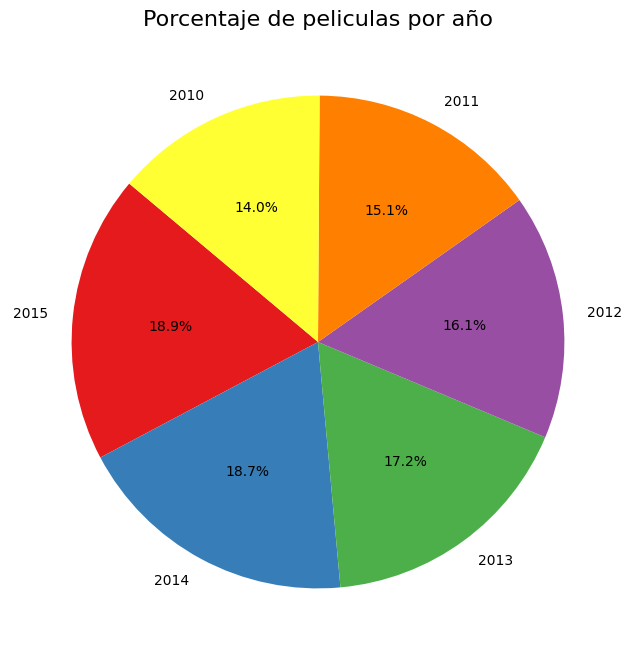

In [25]:
year_counts = df['year'].value_counts()
year_labels = year_counts.index
year_sizes = year_counts.values

plt.figure(figsize=(8, 8))
plt.pie(year_sizes, labels=year_labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set1"))
plt.title('Porcentaje de peliculas por año', fontsize=16)
plt.show()

Podemos concluir que si bien se encuentra bastente distribuido en todos los años, en los últimos 3 años se generaron más cantidad de las  mismas.
Si visualizamos el gráfico de tortas con porcentajes, podemos concluir que se encuentra muy bien distribuída la cantidad entre años.  

<ipython-input-26-8a0b9d466f4c>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Género', fontsize=12)


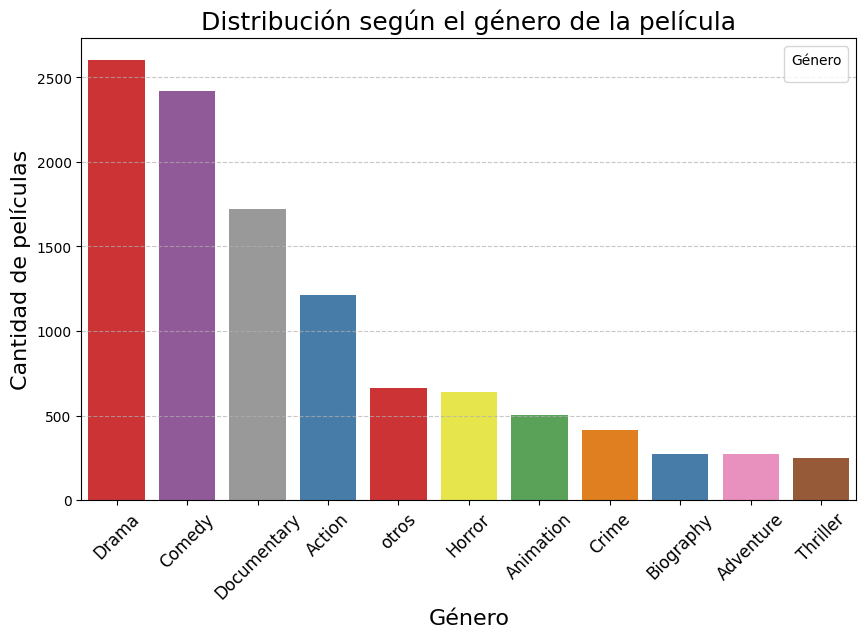

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='genre', order=df['genre'].value_counts().index, palette='Set1', hue='genre')
plt.title('Distribución según el género de la película', fontsize=18)
plt.xlabel('Género', fontsize=16)
plt.ylabel('Cantidad de películas', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Género', fontsize=12)
plt.show()

Podemos identificar que los géneros predominantes son "Drama", "Comedia", "Documental" y "Acción". La quinta categoría es "Otros", teniendo mayor relevancia que los otros géneros. Queda claro en el gráfico que las primeras 4 categorías abarcan casi todo el dataset.

<ipython-input-27-04c23ea99041>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='País', fontsize=12)


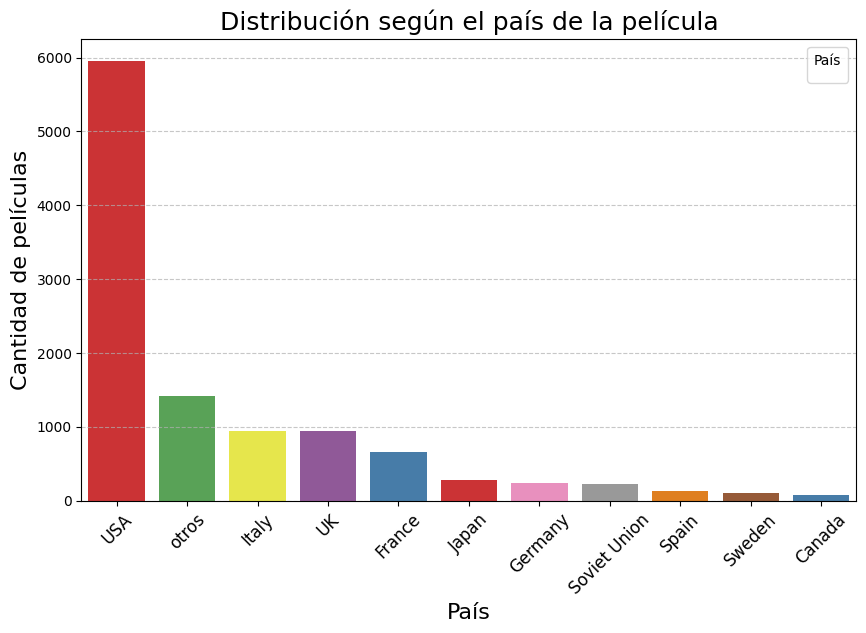

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='country', order=df['country'].value_counts().index, palette='Set1', hue='country')
plt.title('Distribución según el país de la película', fontsize=18)
plt.xlabel('País', fontsize=16)
plt.ylabel('Cantidad de películas', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='País', fontsize=12)
plt.show()

Podemos analizar que el país predomintante es USA (Estados Unidos), siendo la segunda categoría "Otros". También podemos observar que la primer categoría abarca casi por completo el dataset.

<ipython-input-28-d15b17173678>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Lenguaje', fontsize=12)


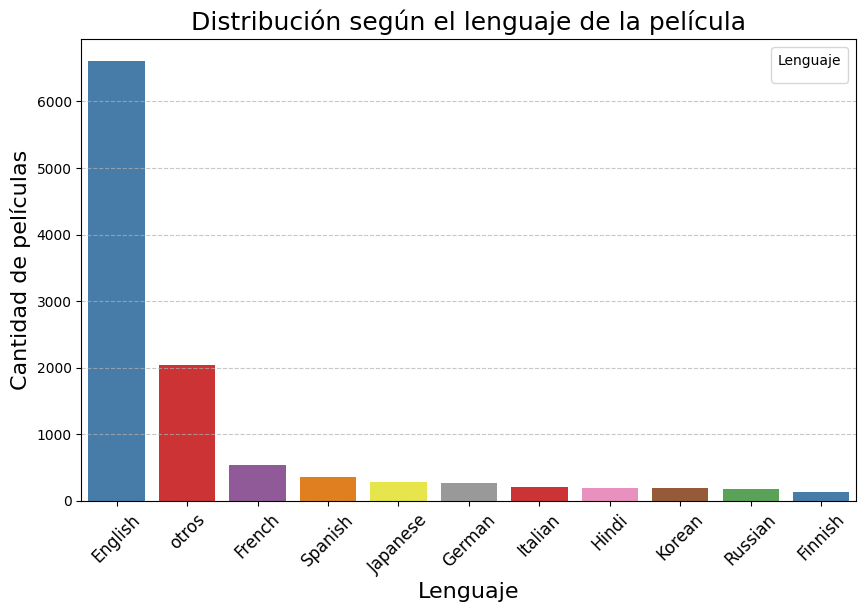

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='language', order=df['language'].value_counts().index, palette='Set1', hue='language')
plt.title('Distribución según el lenguaje de la película', fontsize=18)
plt.xlabel('Lenguaje', fontsize=16)
plt.ylabel('Cantidad de películas', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Lenguaje', fontsize=12)
plt.show()

Al igual que con País, existe una gran relevancia de la primera categoría, siendo "otros" la de segunda importancia.

Media de imdbRating: 6.258808707921791
Mediana de imdbRating: 6.3
Moda de imdbRating: 6.25880870792179


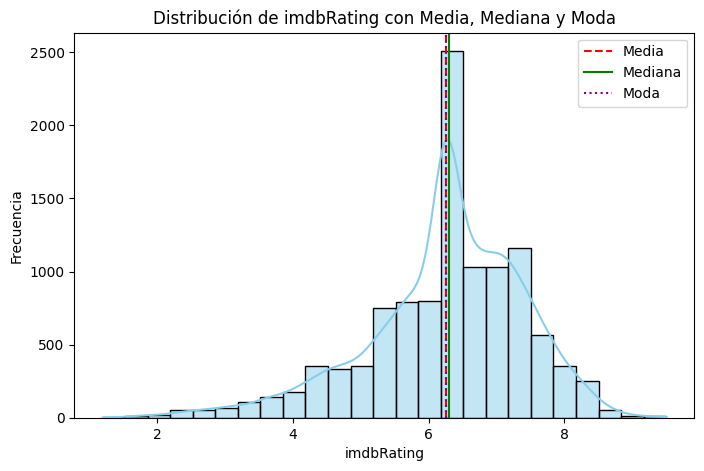

In [29]:
media_imdbRating = df['imdbRating'].mean()
mediana_imdbRating= df['imdbRating'].median()
moda_imdbRating = df['imdbRating'].mode()[0]

print("Media de imdbRating:", media_imdbRating)
print("Mediana de imdbRating:", mediana_imdbRating)
print("Moda de imdbRating:", moda_imdbRating)
plt.figure(figsize=(8, 5))
sns.histplot(df['imdbRating'], kde=True, color='skyblue', bins=25)
plt.axvline(media_imdbRating, color='red', linestyle='--', label='Media')
plt.axvline(mediana_imdbRating, color='green', linestyle='-', label='Mediana')
plt.axvline(moda_imdbRating, color='purple', linestyle=':', label='Moda')
plt.xlabel('imdbRating')
plt.ylabel('Frecuencia')
plt.legend()
plt.title('Distribución de imdbRating con Media, Mediana y Moda')
plt.show()

Dado que la media y la mediana son bastante cercanas (solo hay una diferencia de 0.04), podemos concluir que la distribución de ImbdRating es relativamente simétrica. Como la media y la mediana no están demasiado distantes, no parece haber una asimetría extrema (ni sesgo a la derecha ni a la izquierda).

In [30]:
z_scores = stats.zscore(df['imdbRating'])
umbral = 3
outliers = np.abs(z_scores) > umbral
outliers_df = df[outliers]
print(f"Cantidad de outliers detectados: {outliers_df.shape[0]}")


Cantidad de outliers detectados: 110


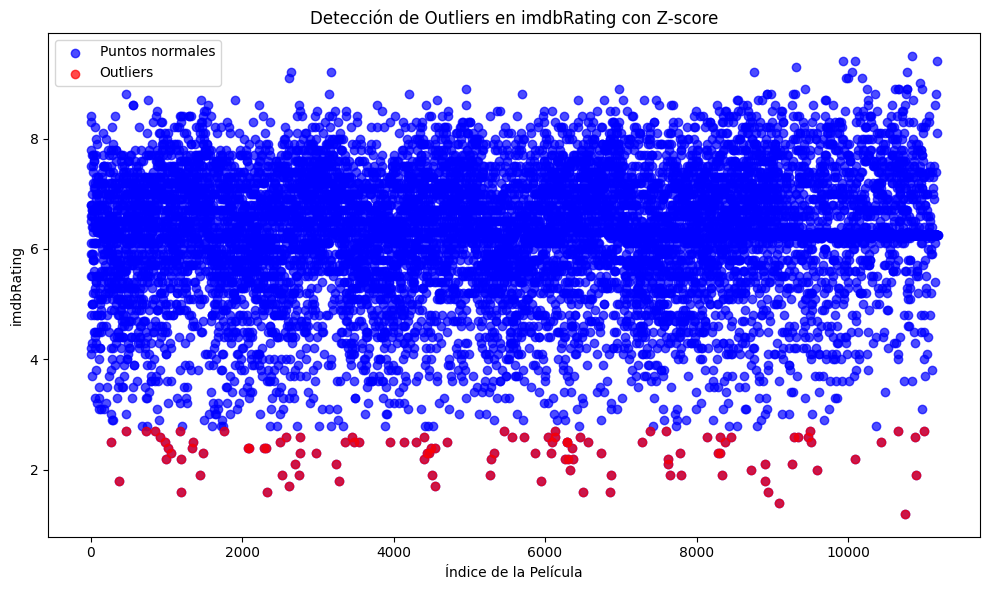

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['imdbRating'], label='Puntos normales', color='blue', alpha=0.7)
plt.scatter(df.index[outliers], df['imdbRating'][outliers], color='red', label='Outliers', alpha=0.7)
plt.title('Detección de Outliers en imdbRating con Z-score')
plt.xlabel('Índice de la Película')
plt.ylabel('imdbRating')
plt.legend()
plt.tight_layout()
plt.show()

In [32]:
df_no_outliers = df[~outliers]

print(f"Cantidad de datos después de eliminar outliers: {df_no_outliers.shape[0]}")


Cantidad de datos después de eliminar outliers: 10866


Podemos detectar que hay algunos valores outliers, vamos a eliminarlos ya que no sirven para el análisis del caso, por un lado son datos que se alejan de la media y van a ayudar a determinar el modelo.

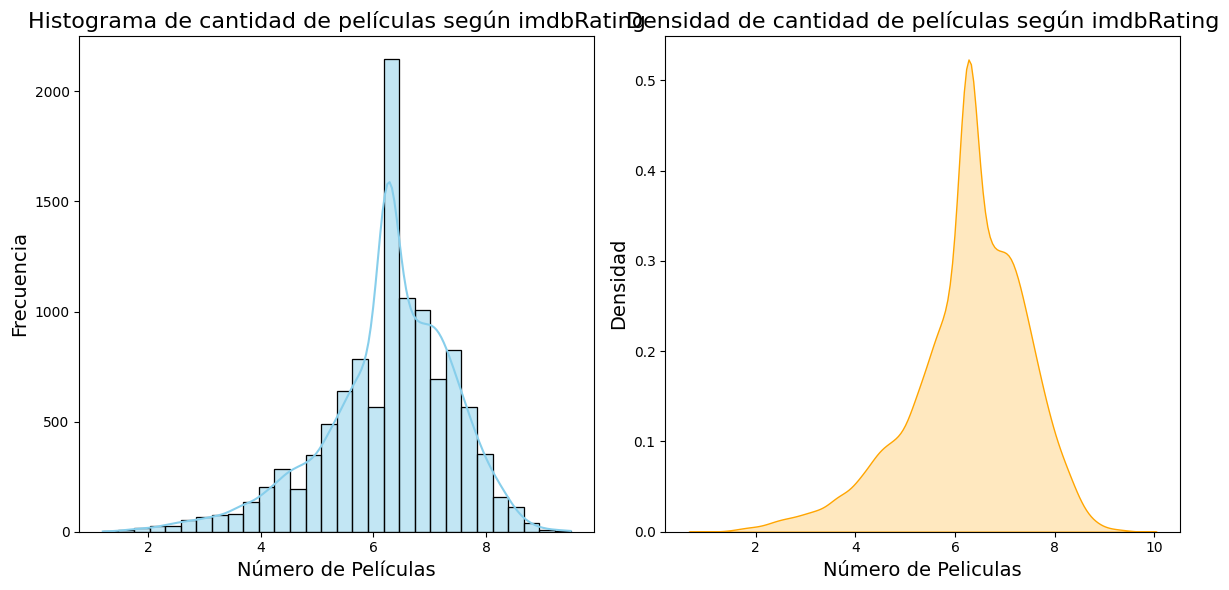

Simetría: -0.76
Curtosis: 1.00


In [33]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['imdbRating'], bins=30, kde=True, color='skyblue')
plt.title('Histograma de cantidad de películas según imdbRating', fontsize=16)
plt.xlabel('Número de Películas', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

plt.subplot(1, 2, 2)
sns.kdeplot(df['imdbRating'], fill=True, color='orange')
plt.title('Densidad de cantidad de películas según imdbRating', fontsize=16)
plt.xlabel('Número de Peliculas', fontsize=14)
plt.ylabel('Densidad', fontsize=14)

plt.tight_layout()
plt.show()

skewness = df['imdbRating'].skew()
kurtosis = df['imdbRating'].kurtosis()

print(f"Simetría: {skewness:.2f}")
print(f"Curtosis: {kurtosis:.2f}")

 **Simetría**: es negativa, lo que indica que los datos están ligeramente sesgados hacia la izquierda.
 **Cuartosis**: una distribución con colas ligeras, es decir, los valores extremos son menos frecuentes. En este caso, la distribución tiene un comportamiento más cercano a una distribución normal
 Los datos presentan una distribución con menos valores extremos, más parecida a una distribución normal, aunque no exacta.

**Análisis Bivariado con gráficos**

Vamos a realizar análisis de diferentes variables para poder medir la correlación.
 - Analizaremos la relación de los géneros con ImbdRating
 - Analizaremos la relación de ImbdVotes con ImbdRating
 - Analizaremos la relación de años con ImbdRating
 - Analizaremos la relación de lenguaje con ImbdRating
 - Analizaremos la relación de país con ImbdRating
 - Analizaremos la correlación entre nuestras variables numéricas y categóricas



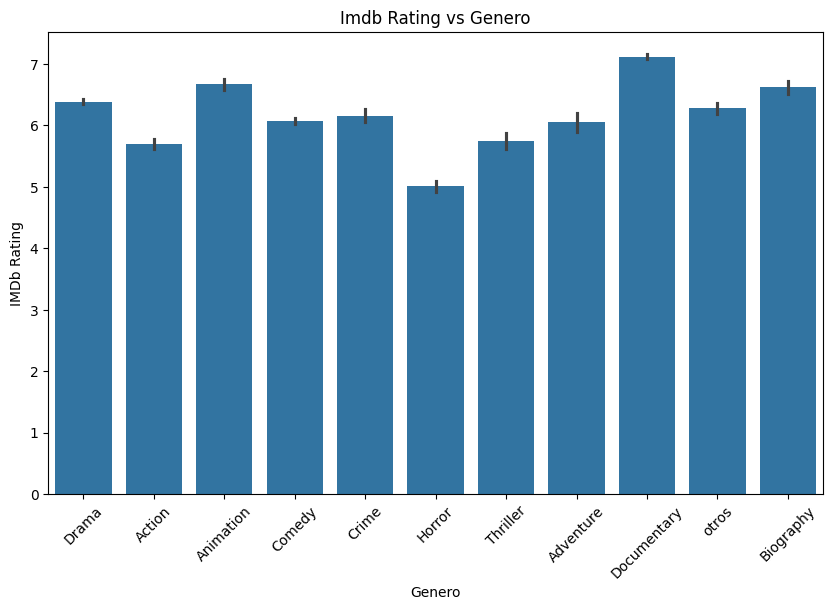

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(x='genre', y='imdbRating', data=df)
plt.title('Imdb Rating vs Genero')
plt.xlabel('Genero')
plt.ylabel('IMDb Rating')
plt.xticks(rotation=45)
plt.show()


Podemos determinar que el género con mayor cantidad de puntos es "Documentary", mientras que el género menos votado es "Horror".

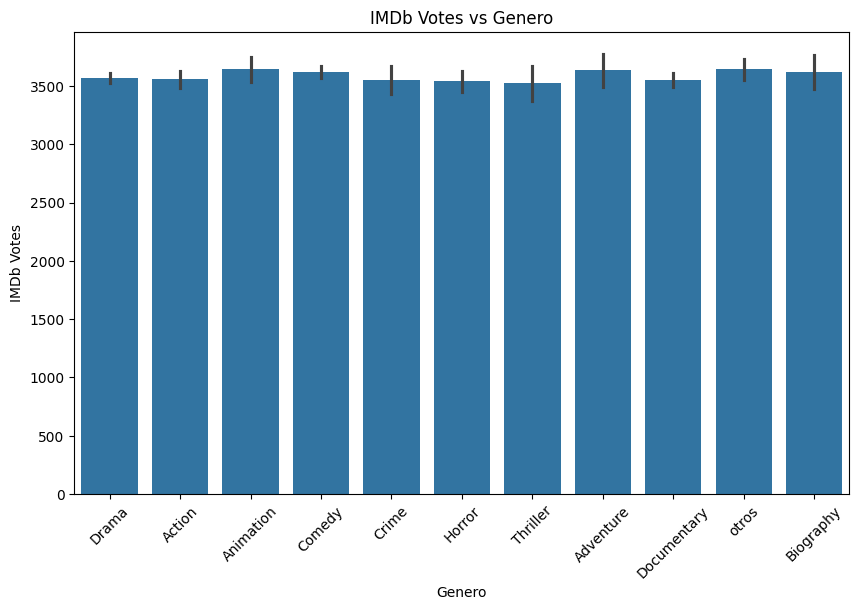

In [35]:
plt.figure(figsize=(10, 6))
sns.barplot(x='genre', y='imdbVotes', data=df)
plt.title('IMDb Votes vs Genero')
plt.xlabel('Genero')
plt.ylabel('IMDb Votes')
plt.xticks(rotation=45)
plt.show()


Analizando los últimos dos gráficos en conjunto podemos determinar que se encuentra bien distribuida la canitdad de votos por género, por lo cuál se puede concluir que es representativo del dataset en general el Imbdrating.

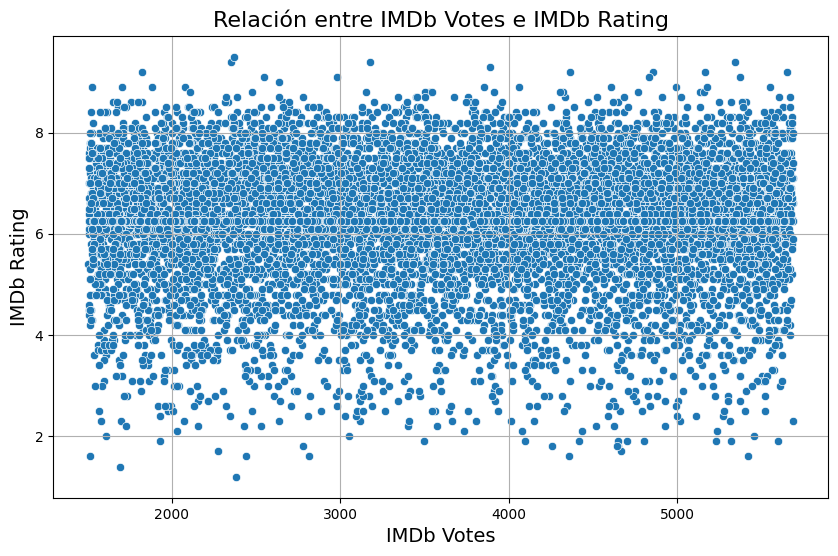

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='imdbVotes', y='imdbRating', data=df)
plt.title('Relación entre IMDb Votes e IMDb Rating', fontsize=16)
plt.xlabel('IMDb Votes', fontsize=14)
plt.ylabel('IMDb Rating', fontsize=14)
plt.grid(True)
plt.show()


Podemos determinar que se encuentran casi todos los datos distribuidos entre el 4 y 8, no habiendo a simple vista valores outliers.

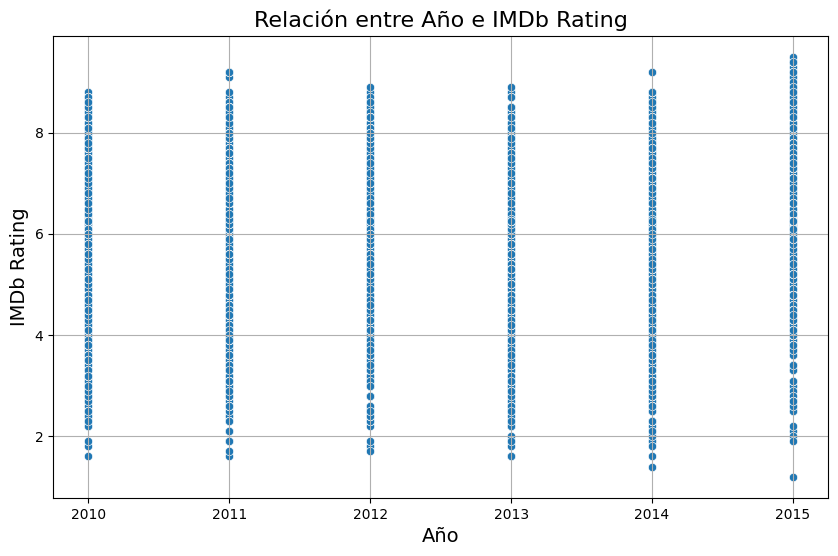

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='imdbRating', data=df)
plt.title('Relación entre Año e IMDb Rating', fontsize=16)
plt.xlabel('Año', fontsize=14)
plt.ylabel('IMDb Rating', fontsize=14)
plt.grid(True)
plt.show()


Podemos determinar que se encuentra muy bien ditribuido el rating según el año, exitiendo un poco mas de distribución entre valores extremos el año 2011 y 2015, pero no representan valores muy por fuera de la norma, salvo en 2015 que hay un valor muy por debajo, pero tambien es donde se encuentran los valores más elevados

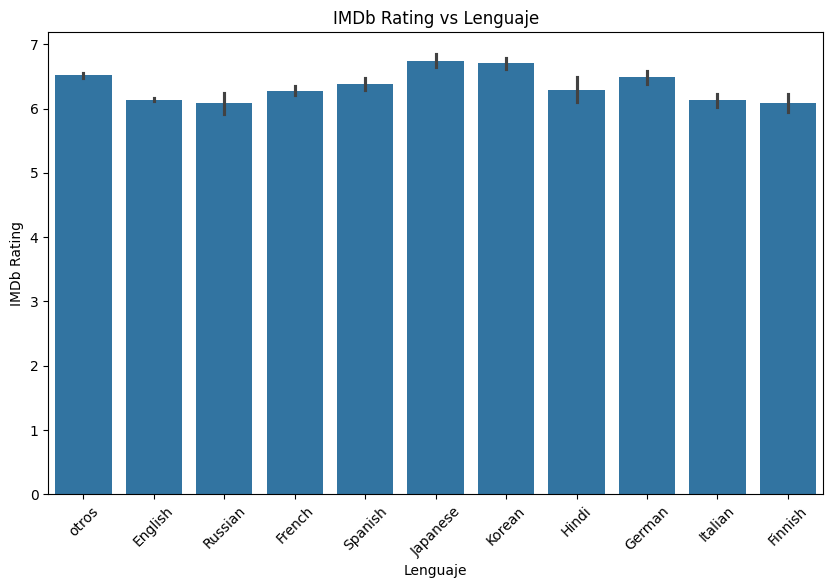

In [38]:
plt.figure(figsize=(10, 6))
sns.barplot(x='language', y='imdbRating', data=df)
plt.title('IMDb Rating vs Lenguaje')
plt.xlabel('Lenguaje')
plt.ylabel('IMDb Rating')
plt.xticks(rotation=45)
plt.show()


El idioma "Japones" y "koreano" se encuentran por encima de los valores generales, podemos determinar que hay una mejor calificación hacia estos lenguajes

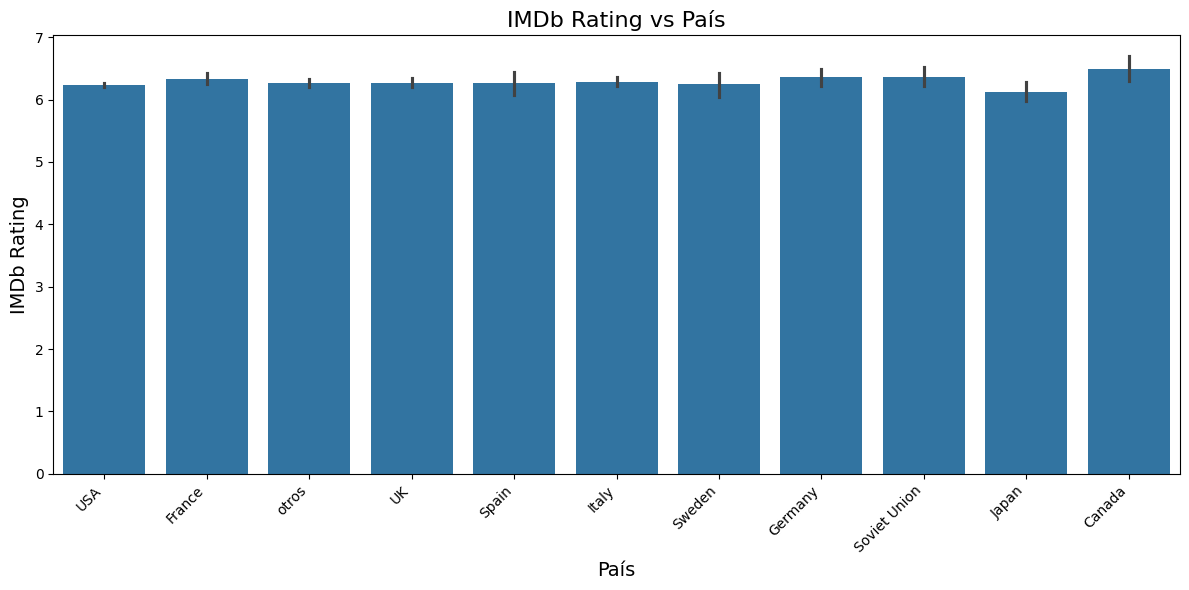

In [39]:
plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='imdbRating', data=df)
plt.title('IMDb Rating vs País', fontsize=16)
plt.xlabel('País', fontsize=14)
plt.ylabel('IMDb Rating', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Podemos visualizar que se encuentra muy bien distribuído el ImbdRating según el país

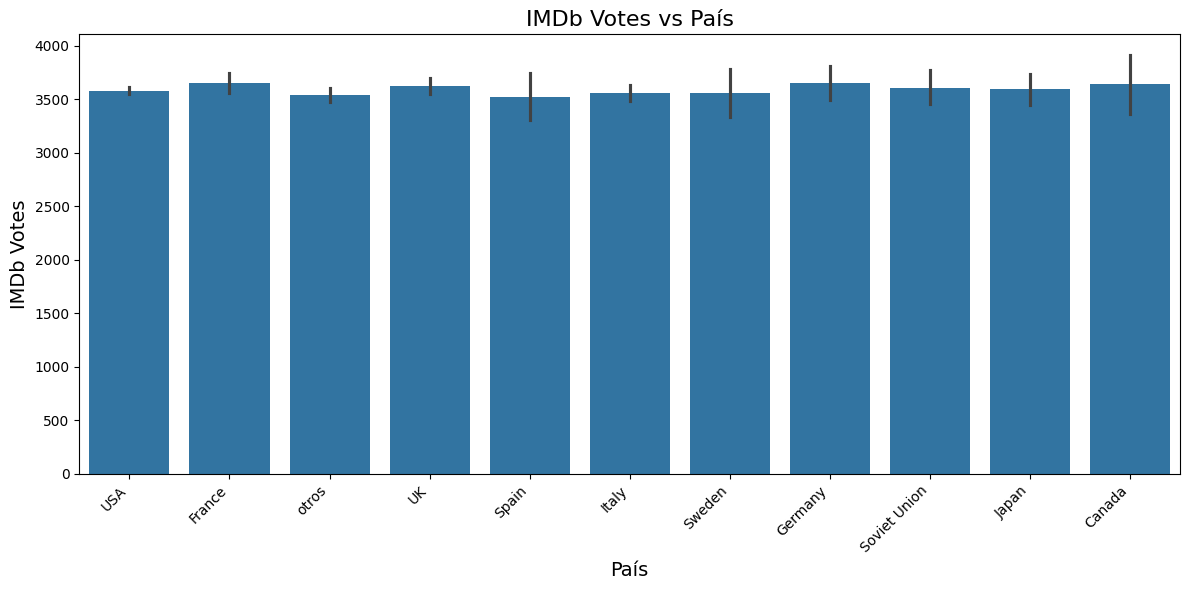

In [40]:
plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='imdbVotes', data=df)
plt.title('IMDb Votes vs País', fontsize=16)
plt.xlabel('País', fontsize=14)
plt.ylabel('IMDb Votes', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Si comparamos ambos gráficos podemos determinar también todos los países reciberon aproximadamente la misma cantidad de votos.

**Analisis multivariado con gráficos**

- Vamos a analizar como se relacionan todas nuestras variables predictoras con ImbdRating

1) Sería interesante ver si hay alguna relacion entre la cantidad de votos, el rating y el año. Puede ser que un año tenga mayor cantidad de votantes, lo cual pueda llegar a ser un sesgo en nuestro análisis

2) Sería interesante relacionar el país y lenguaje con el ImbdRating, para determinar si los paises con el mejor ImbdRating con los lenguajes con el mejor ImbdRating

In [41]:
fig = px.scatter(df, x="imdbVotes", y="imdbRating", color="year", hover_data=['title'])
fig.update_layout(title_text='IMDb Rating - Comparado con ImbdVotes y Años', title_x=0.5)
fig.show()


El gráfico se encuentra bastante bien distribuído, podemos observar una línea clara amarilla marcada en el punto 6. Esa linea esa vinculada al año 2015, por lo cuál podemos determinar que ese año muchas peliculas obtuvieron ese puntaje.
A simple vista los valores en los puntajes mas bajos son mas oscuros, por lo cuál los puntajes más bajos estan en los años 2012 para abajo, mientras que los más altos estan en los años mas altos.
Con respecto a la cantidad de votos, entendemos que esta muy bien distribuida ya que no hay un sesgo claro hacia algún extremo.
Si se puede concluir que la mayor cantidad de votos se encuentran distribuidos entre los ratings 5 a 8, con una clara predominación del valor 6 en el año 2015

<ipython-input-42-d1164b732626>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-42-d1164b732626>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




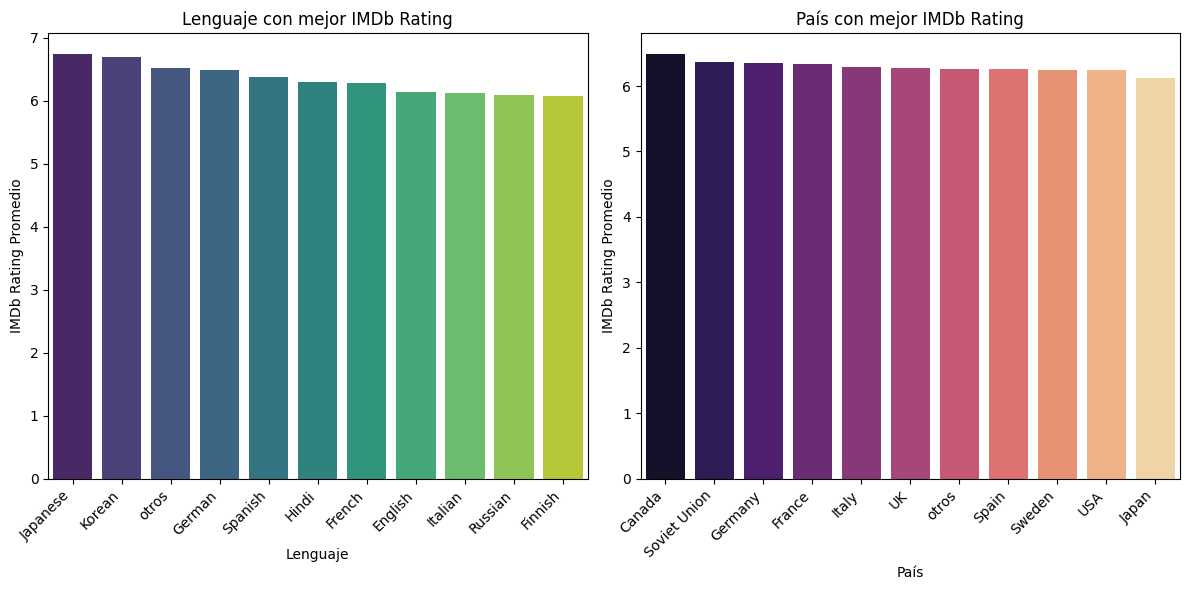

In [42]:
language_rating = df.groupby('language')['imdbRating'].mean().reset_index()
language_rating = language_rating.sort_values('imdbRating', ascending=False)
country_rating = df.groupby('country')['imdbRating'].mean().reset_index()
country_rating = country_rating.sort_values('imdbRating', ascending=False)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='language', y='imdbRating', data=language_rating, palette='viridis')
plt.title('Lenguaje con mejor IMDb Rating')
plt.xlabel('Lenguaje')
plt.ylabel('IMDb Rating Promedio')
plt.xticks(rotation=45, ha='right')
plt.subplot(1, 2, 2)
sns.barplot(x='country', y='imdbRating', data=country_rating, palette='magma')
plt.title('País con mejor IMDb Rating')
plt.xlabel('País')
plt.ylabel('IMDb Rating Promedio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


El lenguaje más votado es el "Japones" por lo cuál se tendría que concluir que el país mejor votado es Japón y si lo análizamos al revés, el país más votado es Canada, por lo cuál el idioma más votado debería ser "Inglés" o "Francés". Podemos determinar que no hay una correlación entre el país y el lenguaje en cuanto a ranking de votos.

<ipython-input-43-6e85dbfeac0e>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




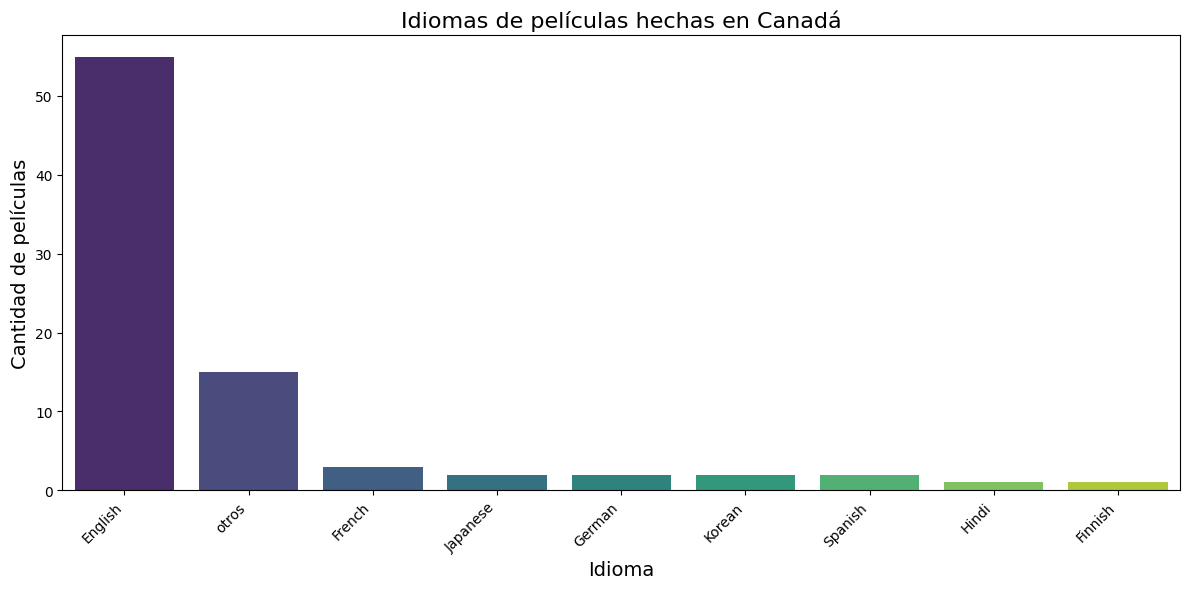

In [43]:
canada_language_counts = df[df['country'] == 'Canada'].groupby('language')['language'].count().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=canada_language_counts.index, y=canada_language_counts.values, palette='viridis')
plt.title('Idiomas de películas hechas en Canadá', fontsize=16)
plt.xlabel('Idioma', fontsize=14)
plt.ylabel('Cantidad de películas', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


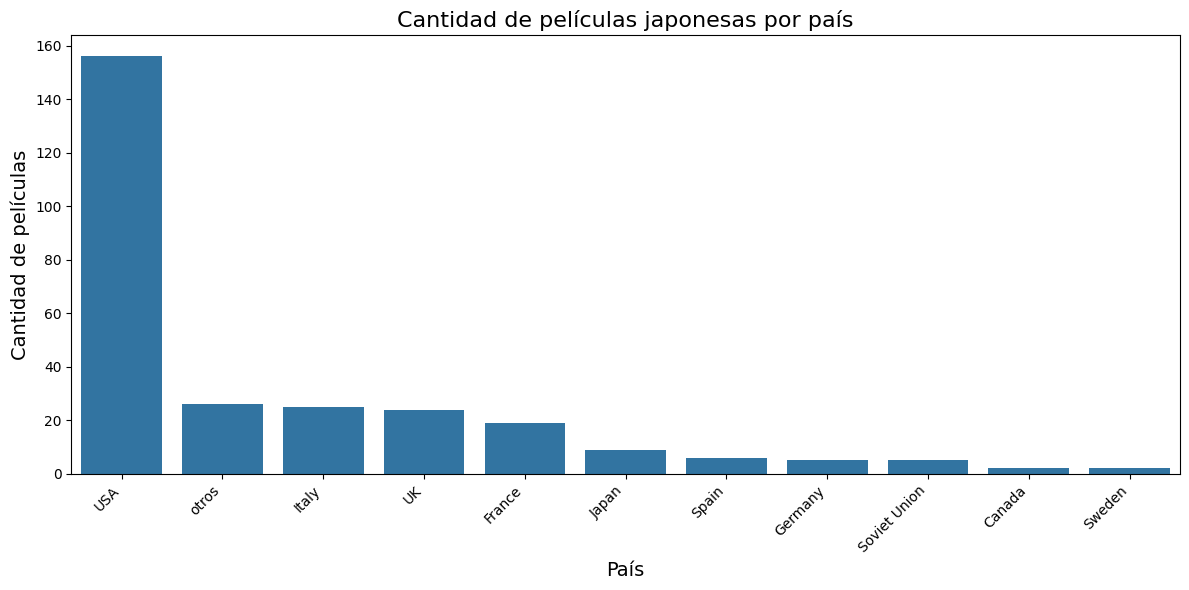

In [44]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df[df['language'] == 'Japanese'], x='country', order=df[df['language'] == 'Japanese']['country'].value_counts().index)
plt.title('Cantidad de películas japonesas por país', fontsize=16)
plt.xlabel('País', fontsize=14)
plt.ylabel('Cantidad de películas', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Podemos observar, según estos últimos dos gráficos, que no existe ninguna relacion entre el país con mayor imbdrating y el lenguaje con mejor imbdrating. Según el segundo grágico, Canada se encuentra en el puesto N°11. Según el primer gráfico, el idioma Japones se encuentra en el puesto N°5

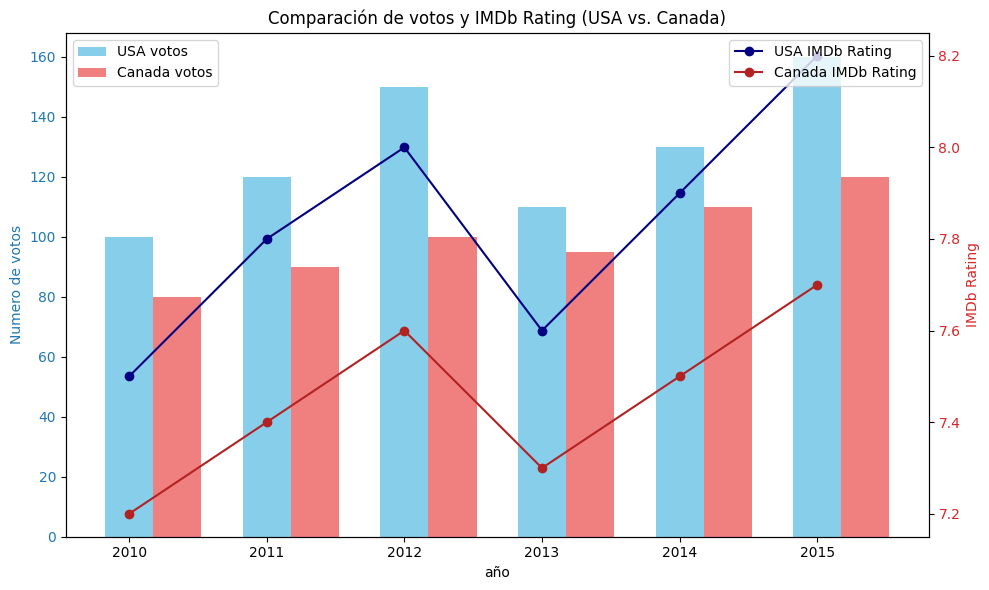

In [45]:
years = [2010, 2011, 2012, 2013, 2014, 2015]
usa_votes = [100, 120, 150, 110, 130, 160]
canada_votes = [80, 90, 100, 95, 110, 120]
usa_imdb = [7.5, 7.8, 8.0, 7.6, 7.9, 8.2]
canada_imdb = [7.2, 7.4, 7.6, 7.3, 7.5, 7.7]
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.bar(years, usa_votes, label='USA votos', color='skyblue', width=0.35, align='center')
ax1.bar([year + 0.35 for year in years], canada_votes, label='Canada votos', color='lightcoral', width=0.35, align='center')
ax1.set_xlabel('año')
ax1.set_ylabel('Numero de votos', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.legend(loc='upper left')
ax2 = ax1.twinx()
ax2.plot(years, usa_imdb, label='USA IMDb Rating', color='navy', marker='o')
ax2.plot(years, canada_imdb, label='Canada IMDb Rating', color='firebrick', marker='o')
ax2.set_ylabel('IMDb Rating', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.legend(loc='upper right')
plt.title('Comparación de votos y IMDb Rating (USA vs. Canada)')
plt.xticks(years)
plt.tight_layout()
plt.show()


Podemos concluir que si bien el país con mejor Imbdrating es Canada, USA tiene muchisimos mas votos, por lo cuál, al contar con mas votos, puede variar mucho mas la media. Si bien es baja la diferencia, no podemos concluir del todo que no se encuentre sesgado el resultado de canada, ya que al tener menos votos es mas sensillo que la media no este influenciada.

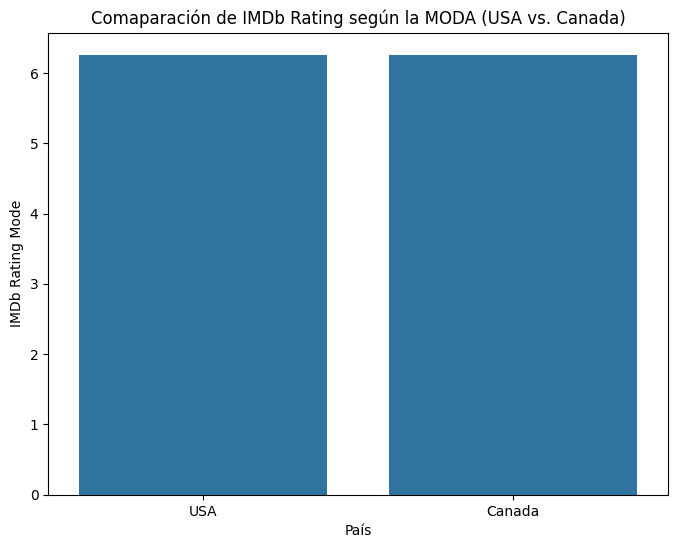

Mode for USA: 6.25880870792179
Mode for Canada: 6.25880870792179


In [46]:
usa_data = df[df['country'] == 'USA']['imdbRating']
canada_data = df[df['country'] == 'Canada']['imdbRating']
usa_mode = usa_data.mode()[0] if not usa_data.mode().empty else "No mode found"
canada_mode = canada_data.mode()[0] if not canada_data.mode().empty else "No mode found"
plt.figure(figsize=(8, 6))
sns.barplot(x=['USA', 'Canada'], y=[usa_mode, canada_mode])
plt.xlabel("País")
plt.ylabel("IMDb Rating Mode")
plt.title("Comaparación de IMDb Rating según la MODA (USA vs. Canada)")
plt.show()

print(f"Mode for USA: {usa_mode}")
print(f"Mode for Canada: {canada_mode}")


La moda (valor que más se repite) es prácticamente igual en ambas variables, por lo cuál sería mas objetivo medir según la moda y no la media.




# **Modelos**


Vamos a poner a prueba distintos modelos para poder determinar cuál es el que mejor se ajusta para poder cumplir nuestra hipotesis y objetivo

**1) Modelo de Regresión**

In [47]:
le = LabelEncoder()
categorical_cols = ['genre', 'country', 'language']
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


Vamos a transformar las variables categoricas en variables númericas a fin de poder ejecutar el modelo.

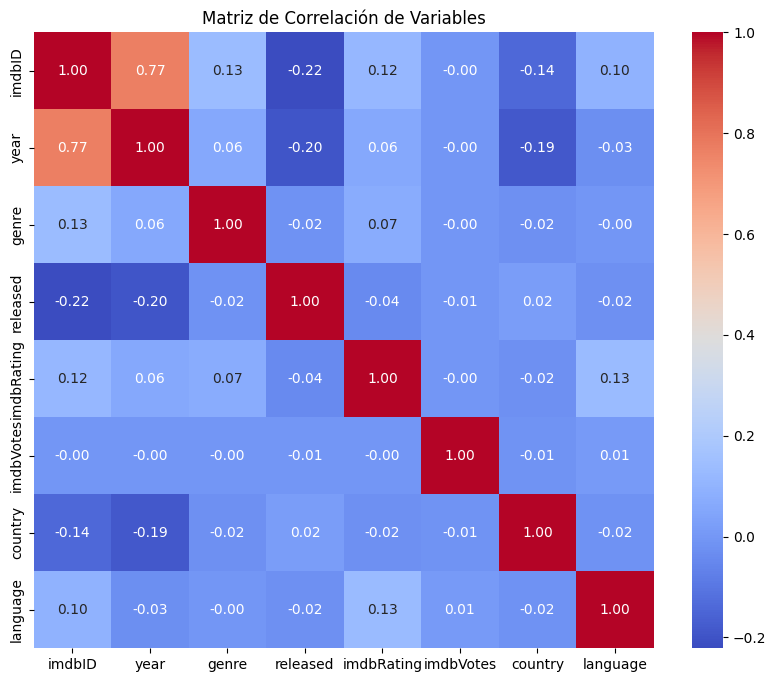

In [48]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Matriz de Correlación de Variables')
plt.show()


Realizmos una matriz de correlación, verificamos que existe una correlación muy baja entre nuestras variables, salvo el imdbID y el año

In [49]:
X = df[['genre', 'country', 'language', 'year', 'imdbVotes']]
y = df['imdbRating']

In [50]:
X.head()

,genre,country,language,year,imdbVotes
0,7,9,10,2010,5309
1,7,9,0,2010,2735
2,0,1,0,2010,5329
3,2,9,0,2010,5201
4,7,1,8,2010,1829


In [51]:
y.head()

,imdbRating
0,6.8
1,5.5
2,8.3
3,7.8
4,4.1


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [54]:
y_pred = model.predict(X_test)

In [55]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)

MAE: 0.8873710558449847
MSE: 1.371261255303514
RMSE: 1.1710086486886055
R²: 0.019817647138373085


**Analisis:**

MAE: Los valores del IMBDRating son entre 1 y 10, por lo cuál, un MAE de 0.8874 podría ser considerado un error relativamente pequeño.

MSE: Las puntuaciones de IMDB Rating varían entre 0 y 10, un MSE de 1.3713 podría ser considerado relativamente alto.

RMSE:  Si el rango del IMDB Rating es de 0 a 10, un error de 1.17 es una desviación significativa, lo que sugiere que el modelo tiene un margen de error considerable.

R²: Un R² de 0.0198 indica que el modelo solo explica el 1.98% de la variabilidad en los IMDB Ratings. Este valor es muy bajo y sugiere que el modelo tiene poco poder predictivo. El modelo no está haciendo un buen trabajo para explicar o predecir los ratings.

In [56]:
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison)

      Actual  Predicted
9360     8.1   6.697003
7969     4.7   6.281078
3887     6.4   6.168873
7008     6.4   6.326235
5611     4.7   6.150425
...      ...        ...
6321     6.3   6.644166
5993     6.9   6.173577
3394     6.3   6.522393
8853     5.3   6.242900
303      7.9   6.092009

[2196 rows x 2 columns]


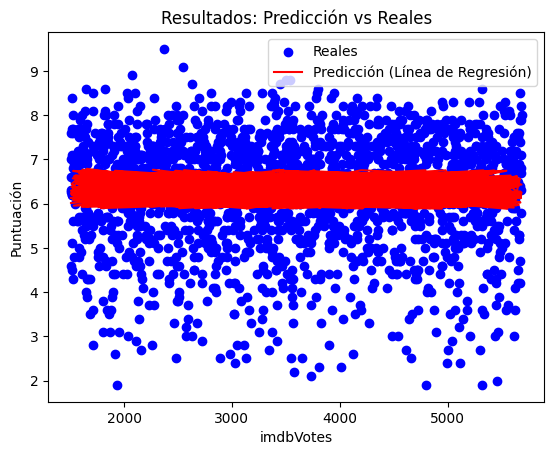

In [57]:
plt.scatter(X_test['imdbVotes'], y_test, color='blue', label='Reales') # X_test was a dataframe, we need a single column
plt.plot(X_test['imdbVotes'], y_pred, color='red', label='Predicción (Línea de Regresión)') # Same with X_test in plt.plot
plt.title('Resultados: Predicción vs Reales')
plt.xlabel('imdbVotes') # Changed this to imdbVotes
plt.ylabel('Puntuación')
plt.legend()
plt.show()

**2) Modelo Random Forest**

In [58]:
X = df[['year', 'imdbVotes', 'genre', 'language', 'country']]
y = df['imdbRating']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42) # You can adjust n_estimators
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [61]:
y_pred_rf = rf_model.predict(X_test)

In [71]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Results:")
print("MAE:", mae_rf)
print("MSE:", mse_rf)
print("RMSE:", rmse_rf)
print("R²:", r2_rf)

Random Forest Results:
MAE: 0.8635632095975507
MSE: 1.3213642094124516
RMSE: 1.149506071933703
R²: 0.055484230477753416


In [ ]:
comparison_rf = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})
print(comparison_rf)

      Actual  Predicted
9360     8.1   7.035233
7969     4.7   6.109000
3887     6.4   6.023000
7008     6.4   5.886000
5611     4.7   5.659588
...      ...        ...
6321     6.3   6.979000
5993     6.9   6.626645
3394     6.3   6.597176
8853     5.3   7.677000
303      7.9   7.846000

[2196 rows x 2 columns]


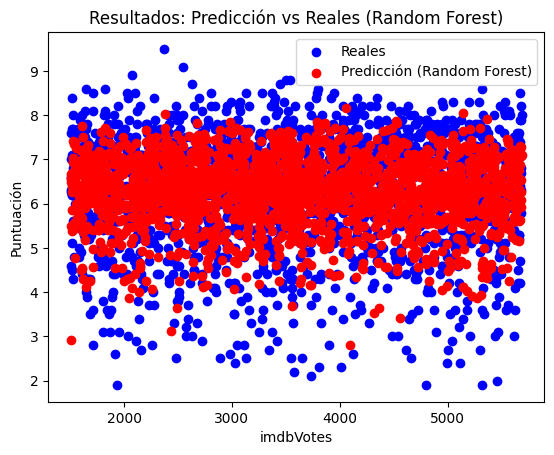

In [62]:
plt.scatter(X_test['imdbVotes'], y_test, color='blue', label='Reales')
plt.scatter(X_test['imdbVotes'], y_pred_rf, color='red', label='Predicción (Random Forest)')
plt.title('Resultados: Predicción vs Reales (Random Forest)')
plt.xlabel('imdbVotes')
plt.ylabel('Puntuación')
plt.legend()
plt.show()

**Análisis**
1. MAE: El MAE del Random Forest es más bajo que el de la regresión lineal (0.888). Esto indica que el Random Forest está haciendo predicciones más precisas en promedio, ya que el error promedio entre las predicciones y los valores reales es más bajo.

2. MSE: El MSE del Random Forest es más bajo que el de la regresión lineal (1.396). Esto sugiere que el Random Forest tiene menos errores grandes en comparación con la regresión lineal, lo que es una señal positiva. Aunque Random Forest sigue teniendo un MSE relativamente alto, es una mejora significativa en comparación con la regresión lineal.

3. RMSE: El RMSE del Random Forest es también más bajo que el del modelo lineal (1.183). Esto implica que, en promedio, las predicciones del modelo están a una distancia más corta de los valores reales, lo que sugiere que el modelo de Random Forest está proporcionando predicciones más cercanas a los valores verdaderos.

4. R²:El R² de 0.0555 sigue siendo bajo, lo que indica que el modelo Random Forest aún no explica una gran parte de la variabilidad en los datos (solo alrededor del 5.55% de la variabilidad). Sin embargo, este valor es significativamente mejor que el R² de la regresión lineal.

El modelo de Random Forest tiene mejor rendimiento que el modelo de regresión lineal. El Random Forest es capaz de capturar relaciones más complejas y no lineales entre las variables, lo que mejora la precisión de las predicciones.

**3) Modelo XGBoost**

In [63]:
X = df[['year', 'imdbVotes', 'genre', 'language', 'country']]
y = df['imdbRating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42) # 'reg:squarederror' es el objetivo predeterminado

In [65]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [66]:
y_pred_xgb = xgb_model.predict(X_test)

In [67]:
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print("XGBoost Results:")
print("MAE:", mae_xgb)
print("MSE:", mse_xgb)
print("RMSE:", rmse_xgb)
print("R²:", r2_xgb)

XGBoost Results:
MAE: 0.8387903763834048
MSE: 1.245256274366149
RMSE: 1.1159105136014038
R²: 0.10988644927931435


In [68]:
comparison_xgb = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_xgb})
print(comparison_xgb)

      Actual  Predicted
9360     8.1   6.874448
7969     4.7   6.377148
3887     6.4   5.839670
7008     6.4   5.578717
5611     4.7   5.645417
...      ...        ...
6321     6.3   6.393968
5993     6.9   6.431587
3394     6.3   6.161980
8853     5.3   7.421368
303      7.9   6.985290

[2196 rows x 2 columns]


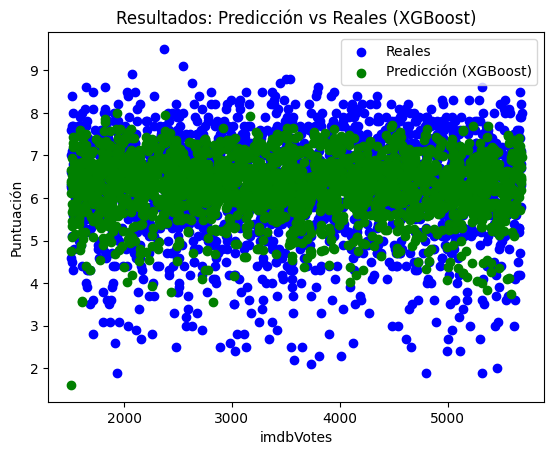

In [69]:
plt.scatter(X_test['imdbVotes'], y_test, color='blue', label='Reales')
plt.scatter(X_test['imdbVotes'], y_pred_xgb, color='green', label='Predicción (XGBoost)')
plt.title('Resultados: Predicción vs Reales (XGBoost)')
plt.xlabel('imdbVotes')
plt.ylabel('Puntuación')
plt.legend()
plt.show()

**Vamos a comparar los tres modelos -**

In [72]:
results_df = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'R²'],
    'Linear Regression': [mae, mse, rmse, r2],
    'Random Forest': [mae_rf, mse_rf, rmse_rf, r2_rf],
    'XGBoost': [mae_xgb, mse_xgb, rmse_xgb, r2_xgb]
})

# Display the comparison table
results_df


,Metric,Linear Regression,Random Forest,XGBoost
0,MAE,0.887371,0.863563,0.838790
1,MSE,1.371261,1.321364,1.245256
2,RMSE,1.171009,1.149506,1.115911
3,R²,0.019818,0.055484,0.109886


**Análisis**
El MAE de XGBoost es el más bajo de los tres modelos, lo que indica que este modelo tiene el menor error promedio en las predicciones. El Random Forest y la regresión lineal tienen un MAE más alto, lo que sugiere que XGBoost es más preciso en promedio en comparación con ambos.

El MSE de XGBoost es significativamente más bajo que el de la regresión lineal y también un poco más bajo que el de Random Forest. Esto indica que XGBoost tiene menos errores grandes en comparación con los otros dos modelos, lo que lo convierte en un modelo más robusto en términos de predicciones precisas.

Un RMSE más bajo indica que las predicciones de XGBoost están, en promedio, más cerca de los valores reales. XGBoost sigue siendo el modelo más preciso, con un RMSE más bajo que Random Forest y regresión lineal.

XGBoost también supera a Random Forest y regresión lineal en términos de R². Aunque el R² no es extremadamente alto, es significativamente mejor que los modelos anteriores. Un R² de 0.1099 sugiere que XGBoost es capaz de explicar aproximadamente el 10.99% de la variabilidad en los datos, lo cual es un avance importante comparado con los modelos anteriores que tenían R² cercanos a 0. Esto indica que XGBoost está haciendo un mejor trabajo al capturar la variabilidad en los datos en comparación con los otros modelos.

En resúmen, el mejor modelo es XGBoost, pero todavía brinda datos que no son satisfactorios. Al igual que con los otros dos modelos, vamos a analizar cada variable independiente por separado.

A fin de verificar si podemos mejorar el modelo, vamos a analizar todas las variables independientes de forma particular

a) Variable "Año"

XGBoost Results (Only Year):
MAE: 0.8917473417609785
MSE: 1.393430857903161
RMSE: 1.1804367233795978
R²: 0.00397073747467136


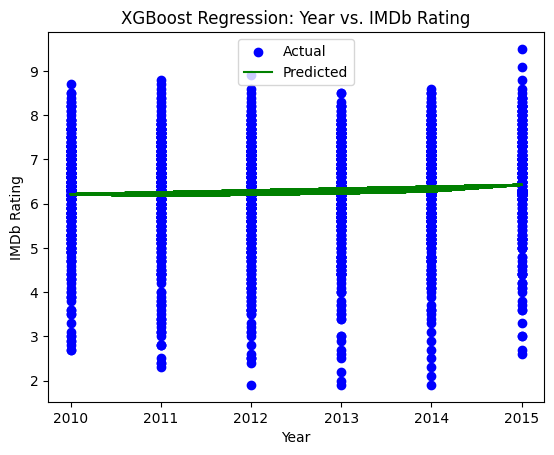

In [73]:
X = df[['year']]
y = df['imdbRating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Results (Only Year):")
print("MAE:", mae_xgb)
print("MSE:", mse_xgb)
print("RMSE:", rmse_xgb)
print("R²:", r2_xgb)

plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred_xgb, color='green', label='Predicted')
plt.title('XGBoost Regression: Year vs. IMDb Rating')
plt.xlabel('Year')
plt.ylabel('IMDb Rating')
plt.legend()
plt.show()


b) Variable "País"

XGBoost Results (Only Country):
MAE: 0.88188825599518
MSE: 1.3980899487577383
RMSE: 1.182408537163758
R²: 0.000640402997289069


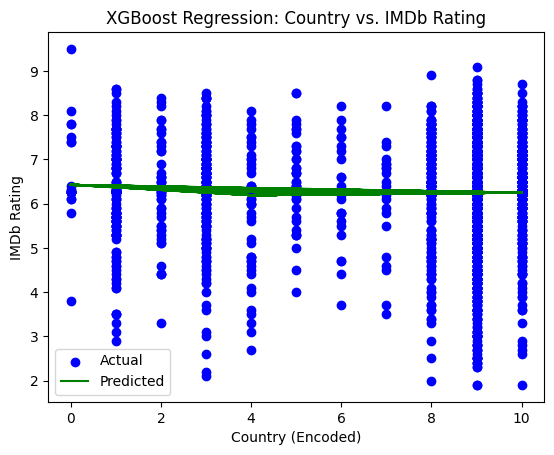

In [74]:
le = LabelEncoder()
df['country'] = le.fit_transform(df['country'])

X = df[['country']]
y = df['imdbRating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Results (Only Country):")
print("MAE:", mae_xgb)
print("MSE:", mse_xgb)
print("RMSE:", rmse_xgb)
print("R²:", r2_xgb)

plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred_xgb, color='green', label='Predicted')
plt.title('XGBoost Regression: Country vs. IMDb Rating')
plt.xlabel('Country (Encoded)')
plt.ylabel('IMDb Rating')
plt.legend()
plt.show()


c) Variable "Lenguaje"

XGBoost Results (Only Language):
MAE: 0.8889397119492704
MSE: 1.3846758424188512
RMSE: 1.1767225001753179
R²: 0.010228853237485125


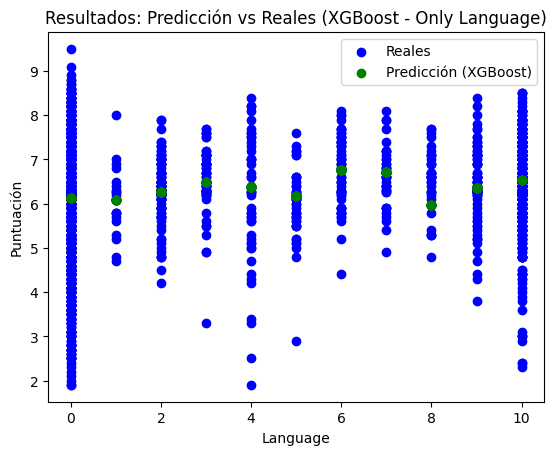

In [75]:
X = df[['language']]
y = df['imdbRating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Results (Only Language):")
print("MAE:", mae_xgb)
print("MSE:", mse_xgb)
print("RMSE:", rmse_xgb)
print("R²:", r2_xgb)


plt.scatter(X_test['language'], y_test, color='blue', label='Reales')
plt.scatter(X_test['language'], y_pred_xgb, color='green', label='Predicción (XGBoost)')
plt.title('Resultados: Predicción vs Reales (XGBoost - Only Language)')
plt.xlabel('Language')
plt.ylabel('Puntuación')
plt.legend()
plt.show()


d) Variable "imbd Votes"

XGBoost Results (Only IMDb Votes):
MAE: 0.9011003841265461
MSE: 1.4315051798642078
RMSE: 1.196455256106223
R²: -0.02324492134967837


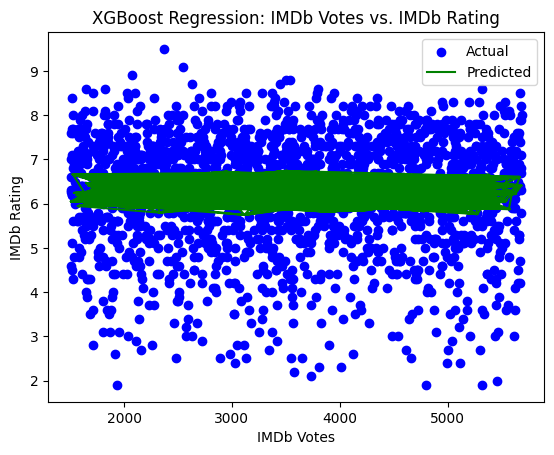

In [76]:
X = df[['imdbVotes']]
y = df['imdbRating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Results (Only IMDb Votes):")
print("MAE:", mae_xgb)
print("MSE:", mse_xgb)
print("RMSE:", rmse_xgb)
print("R²:", r2_xgb)

plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred_xgb, color='green', label='Predicted')
plt.title('XGBoost Regression: IMDb Votes vs. IMDb Rating')
plt.xlabel('IMDb Votes')
plt.ylabel('IMDb Rating')
plt.legend()
plt.show()


e) Variable "Género"

XGBoost Results (Only Genre):
MAE: 0.8012213323971403
MSE: 1.137626334645842
RMSE: 1.06659567533618
R²: 0.18682070753636326


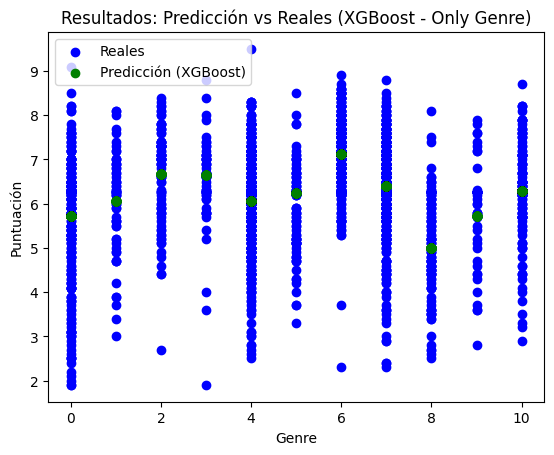

In [77]:
X = df[['genre']]
y = df['imdbRating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Results (Only Genre):")
print("MAE:", mae_xgb)
print("MSE:", mse_xgb)
print("RMSE:", rmse_xgb)
print("R²:", r2_xgb)

plt.scatter(X_test['genre'], y_test, color='blue', label='Reales')
plt.scatter(X_test['genre'], y_pred_xgb, color='green', label='Predicción (XGBoost)')
plt.title('Resultados: Predicción vs Reales (XGBoost - Only Genre)')
plt.xlabel('Genre')
plt.ylabel('Puntuación')
plt.legend()
plt.show()


In [79]:
def evaluate_xgboost_single_feature(df, feature_name):
  X = df[[feature_name]]
  y = df['imdbRating']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
  xgb_model.fit(X_train, y_train)
  y_pred_xgb = xgb_model.predict(X_test)

  mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
  mse_xgb = mean_squared_error(y_test, y_pred_xgb)
  rmse_xgb = np.sqrt(mse_xgb)
  r2_xgb = r2_score(y_test, y_pred_xgb)


  return mae_xgb, mse_xgb, rmse_xgb, r2_xgb



features = ['country', 'language', 'genre', 'imdbVotes', 'year']

results = {}

for col in ['country', 'language', 'genre']:
    if df[col].dtype == 'object':
      le = LabelEncoder()
      df[col] = le.fit_transform(df[col])



for feature in features:
    results[feature] = evaluate_xgboost_single_feature(df, feature)


results_df = pd.DataFrame.from_dict(results, orient='index', columns=['MAE', 'MSE', 'RMSE', 'R²'])
results_df


,MAE,MSE,RMSE,R²
country,0.881888,1.398090,1.182409,0.000640
language,0.888940,1.384676,1.176723,0.010229
genre,0.801221,1.137626,1.066596,0.186821
imdbVotes,0.901100,1.431505,1.196455,-0.023245
year,0.891747,1.393431,1.180437,0.003971


**Análisis**
El modelo con Género es el que tiene el mejor desempeño. El R² más alto y los errores más bajos (especialmente el MAE de 0.8012) indican que Género tiene una relación significativa con el IMDb Rating, y que el modelo de XGBoost puede hacer predicciones bastante precisas cuando se usa esta variable. Este es el modelo que se debe priorizar. El modelo con IMDb Votes tiene el peor desempeño. El R² negativo y los errores elevados sugieren que esta variable no es útil en absoluto para predecir el IMDb Rating en este caso, incluso empeorando el modelo.

**Para concluir con el análisis de los tres modelos, tanto con todas las variables independientes juntas, como por separado. Podemos concluir que la variable "IMDB VOTES" no ayuda a predecir nada del modelo, es más, lo empeora. Vamos a realizar una análisis del modelo XGBOOST sin la variable mencionada para ver si mejoran los resultados**

In [80]:
X = df[['year', 'genre', 'language', 'country']]
y = df['imdbRating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Results (without imdbVotes):")
print("MAE:", mae_xgb)
print("MSE:", mse_xgb)
print("RMSE:", rmse_xgb)
print("R²:", r2_xgb)

comparison_xgb = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_xgb})
comparison_xgb


XGBoost Results (without imdbVotes):
MAE: 0.808634446955564
MSE: 1.170065508656767
RMSE: 1.0816956636026454
R²: 0.16363307222329626


,Actual,Predicted
9360,8.1,7.186398
7969,4.7,6.099806
3887,6.4,6.121713
7008,6.4,6.071395
5611,4.7,5.597272
...,...,...
6321,6.3,6.106092
5993,6.9,6.270185
3394,6.3,6.432880
8853,5.3,7.122468


**Análisis comparando los resultados obtenidos cuando excluimos el IMDB VOTES**

El MAE es menor cuando no se utiliza IMDb Votes, lo que indica que el modelo es más preciso y tiene predicciones más cercanas a los valores reales del IMDb Rating sin esta variable.

El MSE es también más bajo sin IMDb Votes, lo que significa que el modelo tiene menos errores grandes (puntos alejados de las predicciones) cuando no incluye esta variable.

Similar al MSE, el RMSE también es más bajo sin IMDb Votes, lo que refuerza la conclusión de que el modelo sin IMDb Votes tiene una mejor capacidad de predicción con errores más pequeños.

R² también es más alto sin IMDb Votes, lo que indica que el modelo es capaz de explicar una mayor proporción de la variabilidad en el IMDb Rating sin esta variable. Con IMDb Votes, el modelo explica solo el 10.99% de la variabilidad, mientras que sin ella explica un 16.36%, lo cual es una mejora significativa.

# **Optimización de modelos**

**Validación cruzada - Grid Search**

Pare el mejor modelo - XGBOOST sin variable IMBDVOTES

In [81]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

X = df[['year', 'genre', 'language', 'country']]
y = df['imdbRating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)

best_xgb_model = grid_search.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Results (without imdbVotes - after GridSearch):")
print("MAE:", mae_xgb)
print("MSE:", mse_xgb)
print("RMSE:", rmse_xgb)
print("R²:", r2_xgb)


Best hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
XGBoost Results (without imdbVotes - after GridSearch):
MAE: 0.7794870457490063
MSE: 1.079236555640985
RMSE: 1.0388631072672594
R²: 0.2285579262805647


**Validación cruzada - Random Search**

In [82]:
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.5],
    'min_child_weight': [1, 3, 5]
}

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

random_search = RandomizedSearchCV(estimator=xgb_model,
                                   param_distributions=param_dist,
                                   n_iter=50,
                                   cv=5,
                                   scoring='neg_mean_squared_error',
                                   n_jobs=-1,
                                   random_state=42,
                                   verbose=1)

X = df[['year', 'genre', 'language', 'country']]
y = df['imdbRating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

random_search.fit(X_train, y_train)

print("Best hyperparameters:", random_search.best_params_)
print("Best negative mean squared error:", random_search.best_score_)


best_xgb_model = random_search.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("\nXGBoost Results (without imdbVotes - after RandomizedSearchCV):")
print("MAE:", mae_xgb)
print("MSE:", mse_xgb)
print("RMSE:", rmse_xgb)
print("R²:", r2_xgb)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best hyperparameters: {'subsample': 0.8, 'n_estimators': 100, 'min_child_weight': 5, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0.5, 'colsample_bytree': 0.8}
Best negative mean squared error: -1.0008638731761856

XGBoost Results (without imdbVotes - after RandomizedSearchCV):
MAE: 0.7803355501127649
MSE: 1.0791347059293706
RMSE: 1.0388140863163968
R²: 0.2286307288115066


**Análisis**

En términos de MAE, MSE y RMSE, ambos modelos muestran resultados prácticamente idénticos. Esto implica que, en cuanto a la magnitud de los errores, Grid Search y Random Forest no muestran diferencias notables en su rendimiento.

R² bajo: El valor bajo de R² en ambos casos es una señal de que los modelos no están explicando bien la variabilidad en los datos. Esto podría sugerir que los modelos no son lo suficientemente adecuados para el problema o que hay una falta de features clave o preprocesamiento en los datos.

Aunque Random Search es generalmente un modelo más robusto y flexible que el proceso de búsqueda en cuadrícula de parámetros, en este caso los resultados son prácticamente idénticos entre ambos métodos.

Ajustamos los hiperparametros a fin de verificar si mejora el resultado

In [83]:
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5],
    'min_child_weight': [1, 2, 3, 4, 5],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [0, 0.1, 0.5, 1]
}

# Increase n_iter for more thorough exploration
random_search = RandomizedSearchCV(estimator=xgb_model,
                                   param_distributions=param_dist,
                                   n_iter=100,  # Increased number of iterations
                                   cv=5,
                                   scoring='neg_mean_squared_error',
                                   n_jobs=-1,
                                   random_state=42,
                                   verbose=1)

random_search.fit(X_train, y_train)

print("Best hyperparameters:", random_search.best_params_)
print("Best negative mean squared error:", random_search.best_score_)

best_xgb_model = random_search.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("\nXGBoost Results (without imdbVotes - after improved RandomizedSearchCV):")
print("MAE:", mae_xgb)
print("MSE:", mse_xgb)
print("RMSE:", rmse_xgb)
print("R²:", r2_xgb)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best hyperparameters: {'subsample': 0.8, 'reg_lambda': 0.5, 'reg_alpha': 0, 'n_estimators': 500, 'min_child_weight': 2, 'max_depth': 4, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.8}
Best negative mean squared error: -1.001361502881966

XGBoost Results (without imdbVotes - after improved RandomizedSearchCV):
MAE: 0.7779261245668816
MSE: 1.0753827341677868
RMSE: 1.0370066220462562
R²: 0.23131265138090462


**Análisis**

Como se observa en los resultados, después de la optimización de los hiperparámetros, hay mejoras pequeñas en todas las métricas de error, aunque no son dramáticas. Esto sugiere que la optimización de los hiperparámetros está haciendo su trabajo, pero el modelo base (XGBoost) podría no ser lo suficientemente potente para este tipo de tarea, o los datos presentan desafíos que dificultan un mejor rendimiento.

Buscamos los mejores hipermarametros y Best Negative Mean Squared Error (Best Negative MSE)

In [84]:
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'learning_rate': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5],
    'min_child_weight': [1, 2, 3, 4, 5, 6],
    'reg_alpha': [0, 0.1, 0.5, 1, 5, 10],
    'reg_lambda': [0, 0.1, 0.5, 1, 5, 10]
}


random_search = RandomizedSearchCV(estimator=xgb_model,
                                   param_distributions=param_dist,
                                   n_iter=200,
                                   cv=5,
                                   scoring='neg_mean_squared_error',
                                   n_jobs=-1,
                                   random_state=42,
                                   verbose=1)

random_search.fit(X_train, y_train)

print("Best hyperparameters:", random_search.best_params_)
print("Best negative mean squared error:", random_search.best_score_)

best_xgb_model = random_search.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test)




Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Best hyperparameters: {'subsample': 0.9, 'reg_lambda': 1, 'reg_alpha': 10, 'n_estimators': 200, 'min_child_weight': 3, 'max_depth': 11, 'learning_rate': 0.1, 'gamma': 0.4, 'colsample_bytree': 1.0}
Best negative mean squared error: -0.9984601726444182


In [85]:
best_params = {'subsample': 0.9, 'reg_lambda': 1, 'reg_alpha': 10, 'n_estimators': 200, 'min_child_weight': 3, 'max_depth': 11, 'learning_rate': 0.1, 'gamma': 0.4, 'colsample_bytree': 1.0}


X = df[['year', 'genre', 'language', 'country']]
y = df['imdbRating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, **best_params)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Results (without imdbVotes - with best hyperparameters):")
print("MAE:", mae_xgb)
print("MSE:", mse_xgb)
print("RMSE:", rmse_xgb)
print("R²:", r2_xgb)

comparison_xgb = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_xgb})
comparison_xgb


XGBoost Results (without imdbVotes - with best hyperparameters):
MAE: 0.776433093099811
MSE: 1.07343844380983
RMSE: 1.0360687447316563
R²: 0.23270243694535309


,Actual,Predicted
9360,8.1,7.008205
7969,4.7,6.192405
3887,6.4,6.117402
7008,6.4,6.057304
5611,4.7,5.792521
...,...,...
6321,6.3,6.587996
5993,6.9,6.190188
3394,6.3,6.526305
8853,5.3,7.172918


Aunque el ajuste de hiperparámetros ha tenido un impacto positivo, las mejoras son mínimas. Esto puede deberse a que el modelo ya estaba bastante optimizado antes de ajustar los hiperparámetros o que las características de los datos no permiten grandes mejoras con un ajuste fino de los parámetros. Sin embargo, la mejora constante en todas las métricas, incluso si es pequeña, indica que el modelo es más preciso con los mejores hiperparámetros.

# **CONCLUSIÓN**

En este proyecto de predicción del IMDB Rating de películas utilizando un conjunto de datos de películas estrenadas entre 2015 y 2019, se probaron varios enfoques de modelado para estimar la variable dependiente (IMDB Rating) utilizando características como género, país de producción, año de estreno, idioma y número de votos.

Los resultados de cada uno de los modelos muestran que hay una mejora progresiva en la capacidad predictiva de los modelos a medida que se elimina la variable número de votos, que inicialmente perjudicaba los modelos.

Vamos a analizar la evolución del R2:
1. Modelo de Regresión Lineal: La regresión lineal mostró un desempeño bajo, con un R² muy cercano a 0. Esto indica que el modelo no explica bien la variabilidad de la variable dependiente (IMDB Rating).
2. Modelo Random Forest: Aunque el rendimiento de Random Forest fue ligeramente mejor que la regresión lineal, aún muestra un R² bajo, lo que indica que el modelo sigue sin capturar efectivamente la variabilidad del IMDB Rating.
3. Modelo XGBoost (Sin Optimización):Mostró una mejora significativa respecto a la regresión lineal y Random Forest. Sin embargo, el R² sigue siendo bajo, lo que sugiere que el modelo mejora la precisión de las predicciones pero no es capaz de capturar completamente la variabilidad del IMDB Rating.
4. Modelo XGBoost (Sin Variable Imdbvotes): Al eliminar la variable número de votos, el modelo de XGBoost mostró una mejora en comparación con los modelos anteriores, con una reducción en los errores y un R² más alto (0.164). Esto indica que la variable de votos podría haber estado introduciendo ruido en los modelos previos, perjudicando la precisión de las predicciones.
5. Modelo XGBoost (Optimizado con Grid Search y sin variable Imdbvotes): La optimización con Grid Search resultó en una mejora adicional, reduciendo el MAE, MSE, y RMSE, y aumentando el R² a 0.229. Aunque este es el mejor rendimiento observado hasta ahora, el modelo todavía tiene un R² bajo en términos absolutos, lo que indica que hay espacio para mejorar.
6. Modelo XGBoost (Optimizado con Random Search y sin variable Imdbvotes):Al comparar estos resultados con el modelo de XGBoost optimizado previamente con Grid Search, podemos ver que los valores de MAE, MSE, y RMSE son muy similares, con diferencias mínimas. Además, el R² obtenido es casi idéntico (0.229 en el modelo optimizado con Grid Search frente a 0.228 en el modelo de Random Search), lo que indica que ambos enfoques de optimización han logrado un rendimiento comparable en términos de capacidad predictiva.

A pesar de que la optimización mejoró el desempeño del modelo, el modelo final sigue teniendo un rendimiento moderado. Un R² de 0.229 significa que el modelo solo puede explicar aproximadamente el 23% de la variabilidad del IMDB Rating. Esto sugiere que, aunque se están capturando algunas relaciones en los datos, aún hay factores importantes que el modelo no está considerando adecuadamente. Esto puede deberse a varios factores, por un lado es posible que la relación entre las características y el IMDB Rating sea más compleja o no lineal de lo que los modelos utilizados hasta ahora pueden manejar adecuadamente. Aunque XGBoost captura bien las interacciones no lineales, aún puede haber relaciones más complejas que no se están capturando. También, las calificaciones de IMDB son altamente subjetivas y dependen de muchos factores que no necesariamente se reflejan en los datos disponibles. La percepción del público puede estar influenciada por elementos que no están cuantificados en el conjunto de datos, como la popularidad de la película, la campaña de marketing, o el momento en que se lanzó la película.


Aunque el modelo XGBoost optimizado ha mostrado la mejor capacidad predictiva hasta ahora, el R² sigue siendo bajo. Esto es indicativo de que se podrían estar pasando por alto factores importantes, y las relaciones entre las variables no se modelan completamente. A pesar de esto, el proceso de modelado muestra una mejora progresiva a medida que se refina el enfoque, lo que sugiere que, con más características y mejoras en el modelo, el desempeño podría aumentar sustancialmente.




